This notebook is for evaluating existing features on redundancy/irrelevancy by preliminary graph analysis of feature value distributions, and if necessary, transforming the distributions. Majority of methods used in this notebook is based on:

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
other resources:

intro to feature selection: https://quantdare.com/what-is-the-difference-between-feature-extraction-and-feature-selection/
feature selection method: https://www.datacamp.com/community/tutorials/feature-selection-python
feature selection tools: https://scikit-learn.org/stable/modules/feature_selection.html
graph usage in representing data: https://365datascience.com/chart-types-and-how-to-select-the-right-one/
Issues:

"The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations." reliability have 2 discrete categories (reliable and unreliable), how to do bivariate analysis? can't use scatter plot. heat map doesn't seem to work?

# Setting up

In [4]:
#enable multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#increase size of output window
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 50em; }</style>"))

#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import feature set as dataframe

In [5]:
data = pd.read_csv('./ActualNewsFeatureData.csv', sep=',')

In [6]:
data.columns

Index(['Unnamed: 0', 'Text', 'Reference', 'Label', '# of Characters',
       '# of Words', '# of Verbs', '# of Noun', '# of Sentence',
       'Average # of Words per Sentence', 'Average # of Characters per Words',
       '# of Question Marks', '% of Subjective Verbs', '% of Passive Voice',
       '% of Positive Words', '% of Negative Words', '# of Unique Wrods/Terms',
       '# of Misspelled Words', '# of Causation Terms',
       '% of generalizing terms', '% of # and quantifiers',
       '1st person pronouns', '2nd and 3rd person pronouns', 'Exclusive term',
       '# of exclamation marks', 'Lexical', 'Singular pronouns(1st person)',
       'Group ref pronouns(1st person)', '2nd 3rd pronouns',
       '# of Characters- sub', '# of Words- sub', '# of Verbs- sub',
       '# of Noun- sub', '# of Sentence- sub',
       'Average # of Words per Sentence- sub',
       'Average # of Characters per Words- sub', '# of Question Marks- sub',
       '% of Subjective Verbs- sub', '% of Passive Voice

In [8]:
data.head(n=3)

Unnamed: 0                                               Text  \
0           0  Coronaviruses caused SARS, MERS, and the curre...   
1           1  The coronavirus — which originated in Wuhan, C...   
2           2  The tech sector is feeling the impact of gover...   

                                           Reference  Label  # of Characters  \
0  Asians and Asian Americans are facing increase...    0.0            150.0   
1  Future cruisegoers are expressing concern over...    0.0            220.0   
2  US stock futures dropped Sunday evening as the...    0.0            115.0   

   # of Words  # of Verbs  # of Noun  # of Sentence  \
0        28.0         7.0        9.0            3.0   
1        42.0         6.0       15.0            2.0   
2        19.0         3.0        9.0            2.0   

   Average # of Words per Sentence  ...  % of generalizing terms- avg sub  \
0                             14.0  ...                             -0.09   
1                             21.0  ...                             -0.09   
2                             19.0  ...                             -0.11   

   % of # and quantifiers- avg sub  1st person pronouns- avg sub  \
0                            -0.55                         -0.03   
1                             0.45                         -0.03   
2                             0.11                         -0.03   

   2nd and 3rd person pronouns- avg sub  Exclusive term- avg sub  \
0                                 -0.34                    -0.01   
1                                 -0.34                    -0.01   
2                                 -0.36                    -0.01   

   # of exclamation marks- avg sub  Lexical- avg sub  \
0                              0.0             -4.49   
1                              0.0              1.03   
2                              0.0             -1.46   

   Singular pronouns(1st person)- avg sub  \
0                                   -0.02   
1                                   -0.02   
2                                   -0.02   

   Group ref pronouns(1st person)- avg sub  2nd 3rd pronouns- avg sub  
0                                    -0.02                      -0.34  
1                                    -0.02                      -0.34  
2                                    -0.02                      -0.36  

[3 rows x 79 columns]

In [9]:
data.describe()

Unnamed: 0       Label  # of Characters  # of Words  # of Verbs  \
count  188.000000  188.000000       188.000000  188.000000  188.000000   
mean    47.468085    0.489362       161.835106   30.925532    5.292553   
std     28.215254    0.501222        50.161338   10.142555    2.495889   
min      0.000000    0.000000        39.000000    6.000000    0.000000   
25%     23.000000    0.000000       123.000000   23.000000    3.000000   
50%     47.500000    0.000000       167.500000   32.000000    5.000000   
75%     71.000000    1.000000       212.250000   40.000000    7.000000   
max     99.000000    1.000000       224.000000   50.000000   11.000000   

        # of Noun  # of Sentence  Average # of Words per Sentence  \
count  188.000000     188.000000                       188.000000   
mean    12.191489       2.398936                        20.226950   
std      4.855730       0.862405                         8.916622   
min      3.000000       1.000000                         3.750000   
25%      8.750000       2.000000                        14.000000   
50%     12.000000       2.000000                        19.000000   
75%     15.000000       3.000000                        24.000000   
max     30.000000       6.000000                        45.000000   

       Average # of Characters per Words  # of Question Marks  ...  \
count                         188.000000           188.000000  ...   
mean                            5.300097             0.010638  ...   
std                             0.552899             0.102866  ...   
min                             3.931034             0.000000  ...   
25%                             4.931818             0.000000  ...   
50%                             5.246951             0.000000  ...   
75%                             5.666667             0.000000  ...   
max                             7.833333             1.000000  ...   

       % of generalizing terms- avg sub  % of # and quantifiers- avg sub  \
count                        188.000000                       188.000000   
mean                           0.037181                        -0.017074   
std                            0.076438                         0.166430   
min                           -0.110000                        -0.600000   
25%                           -0.030000                        -0.160000   
50%                            0.020000                         0.020000   
75%                            0.100000                         0.070000   
max                            0.190000                         0.450000   

       1st person pronouns- avg sub  2nd and 3rd person pronouns- avg sub  \
count                    188.000000                            188.000000   
mean                      -0.017287                              0.084468   
std                        0.013781                              0.148857   
min                       -0.030000                             -0.390000   
25%                       -0.030000                              0.010000   
50%                       -0.020000                              0.090000   
75%                       -0.010000                              0.220000   
max                        0.010000                              0.290000   

       Exclusive term- avg sub  # of exclamation marks- avg sub  \
count               188.000000                            188.0   
mean                  0.004894                              0.0   
std                   0.013344                              0.0   
min                  -0.010000                              0.0   
25%                  -0.010000                              0.0   
50%                   0.000000                              0.0   
75%                   0.012500                              0.0   
max                   0.030000                              0.0   

       Lexical- avg sub  Singular pronouns(1st person)- avg sub  \
count        188.000000              

# Feature data pre-processing

<h2>Data cleaning <!h2>

In [11]:
#analysis of missing data, counting nulls
total_sin = data.isnull().sum().sort_values(ascending=False)
percent_sin = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_sin, percent_sin], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
data.dtypes

Total  Percent
2nd 3rd pronouns- avg sub                   0      0.0
2nd 3rd pronouns                            0      0.0
1st person pronouns                         0      0.0
2nd and 3rd person pronouns                 0      0.0
Exclusive term                              0      0.0
# of exclamation marks                      0      0.0
Lexical                                     0      0.0
Singular pronouns(1st person)               0      0.0
Group ref pronouns(1st person)              0      0.0
# of Characters- sub                        0      0.0
% of generalizing terms                     0      0.0
# of Words- sub                             0      0.0
# of Verbs- sub                             0      0.0
# of Noun- sub                              0      0.0
# of Sentence- sub                          0      0.0
Average # of Words per Sentence- sub        0      0.0
Average # of Characters per Words- sub      0      0.0
# of Question Marks- sub                    0      0.0
% of # and quantifiers                      0      0.0
# of Causation Terms                        0      0.0

Unnamed: 0                                   int64
Text                                        object
Reference                                   object
Label                                      float64
# of Characters                            float64
                                            ...   
# of exclamation marks- avg sub            float64
Lexical- avg sub                           float64
Singular pronouns(1st person)- avg sub     float64
Group ref pronouns(1st person)- avg sub    float64
2nd 3rd pronouns- avg sub                  float64
Length: 79, dtype: object

In [46]:
#dropping feature from feature set with missing data past a threshold
news_all = data.drop((missing_data[missing_data['Percent'] > 0.5]).index,1)
#removing observations from feature set that only has a few missing data
data = data.drop(data.loc[data['Unnamed: 0'].isnull()].index)
#removes all rows containing NaN
data.dropna(inplace=True)
data.isnull().sum().max() #check if any nulls left in set

0

# graph analysis of feature values

<h2> Univariate analysis </h2>

In [26]:
#standardizing feature
def feature_standard(feature):
    print("standardization result analysis of \033[1m"+var+"\033[0;0m :") # bold text    
    feature_scaled = StandardScaler().fit_transform(data[var][:,np.newaxis]);
    low_range = feature_scaled[feature_scaled[:,0].argsort()][:10]
    high_range = feature_scaled[feature_scaled[:,0].argsort()][-10:]
    print('outer range (low) of the distribution:')
    print(low_range)
    print('\nouter range (high) of the distribution:')
    print(high_range)
    print()

In [33]:
# graphing distributions of feature values
def feature_distrib(feature):
    fig, ax =plt.subplots(1,2)
    #histogram
    sns.distplot(data[var], ax=ax[0]).set_title("For "+feature+" : "
                                                    +"Skewness: %f" % data[var].skew()
                                                    +" Kurtosis: %f" % data[var].kurt())
    #box plot feature x/reliability
    sns.boxplot(x='Label', y=var, data=data, ax=ax[1])
    
    fig.show()
    #probability plot
    fig = plt.figure()
    res = stats.probplot(data[var], plot=plt)

In [34]:
#list of features to analyze
feature_list = [e for e in (list(news_all)) if e not in ('Unnamed: 0','Text', "Reference",'Label')]

In [35]:
for var in feature_list:
    feature_standard(var)

standardization result analysis of # of Characters :
outer range (low) of the distribution:
[[-2.4553393 ]
 [-2.41536149]
 [-2.29542806]
 [-2.29542806]
 [-2.0755501 ]
 [-2.03557229]
 [-1.91563886]
 [-1.83568324]
 [-1.675772  ]
 [-1.63579419]]

outer range (high) of the distribution:
[[1.18264145]
 [1.18264145]
 [1.18264145]
 [1.18264145]
 [1.18264145]
 [1.20263036]
 [1.20263036]
 [1.22261926]
 [1.22261926]
 [1.24260817]]

standardization result analysis of # of Words :
outer range (low) of the distribution:
[[-2.46408206]
 [-2.36522431]
 [-2.26636656]
 [-2.16750881]
 [-2.06865105]
 [-1.9697933 ]
 [-1.7720778 ]
 [-1.67322004]
 [-1.67322004]
 [-1.67322004]]

outer range (high) of the distribution:
[[1.39137028]
 [1.49022803]
 [1.49022803]
 [1.49022803]
 [1.49022803]
 [1.49022803]
 [1.58908579]
 [1.58908579]
 [1.68794354]
 [1.88565904]]

standardization result analysis of # of Verbs :
outer range (low) of the distribution:
[[-2.12617031]
 [-1.72444165]
 [-1.72444165]
 [-1.72444165]
 [-1.7

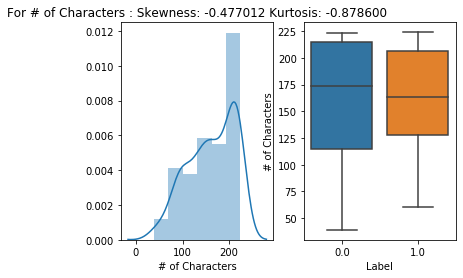

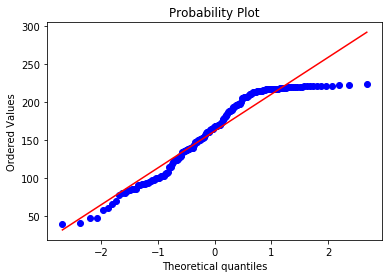

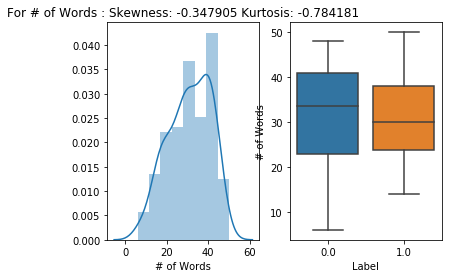

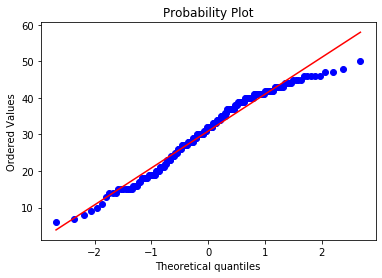

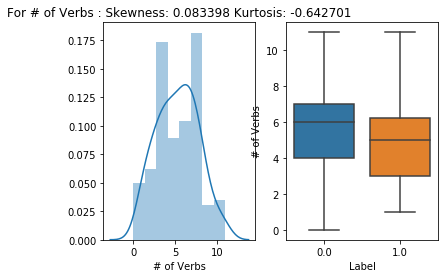

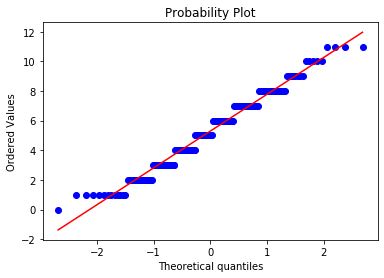

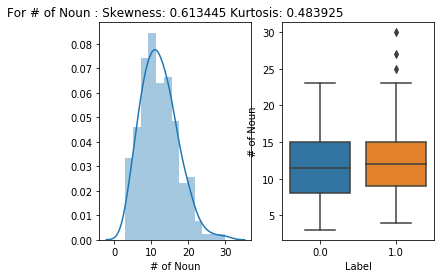

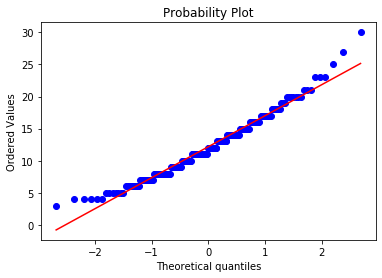

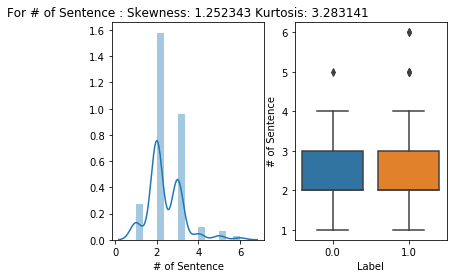

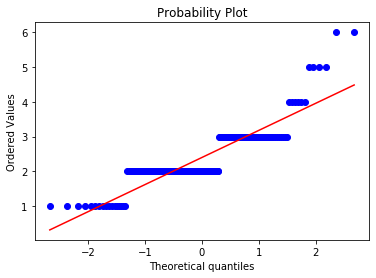

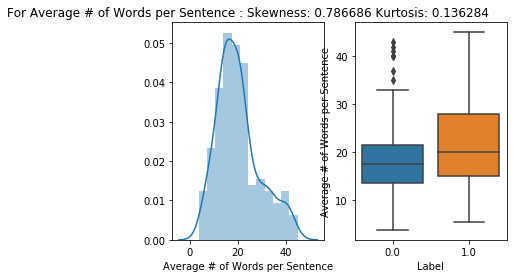

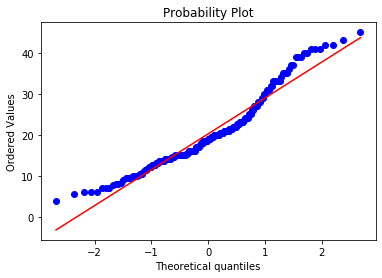

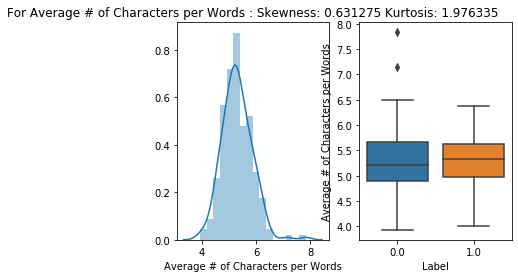

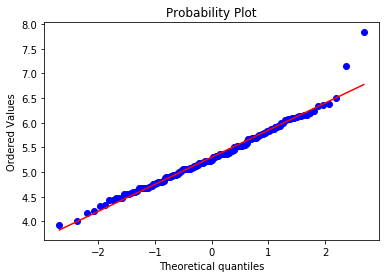

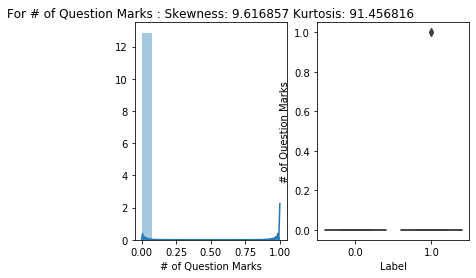

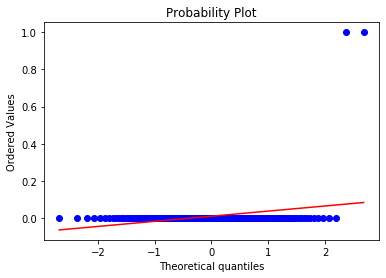

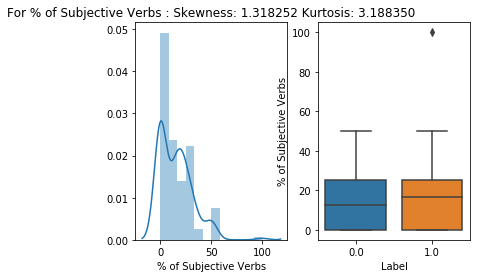

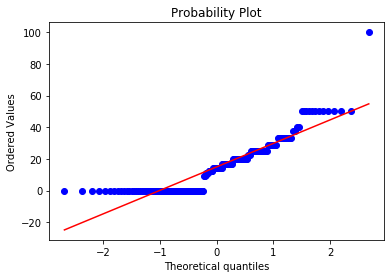

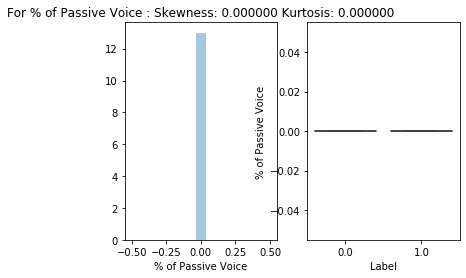

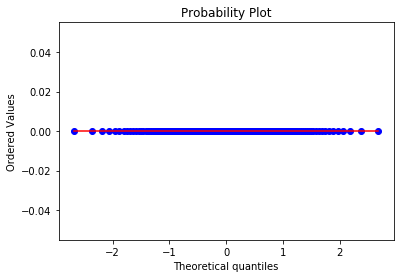

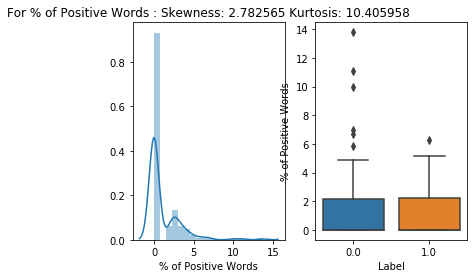

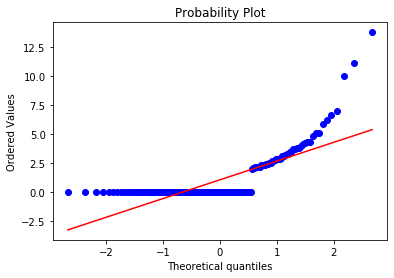

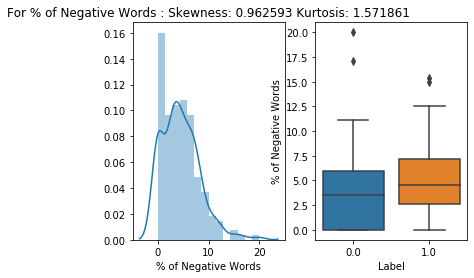

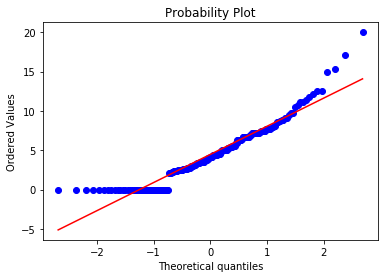

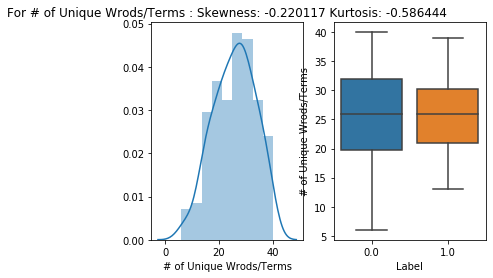

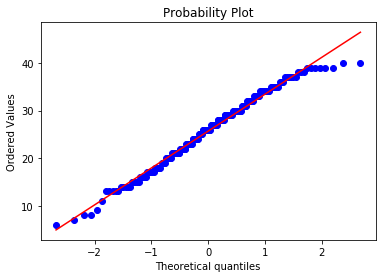

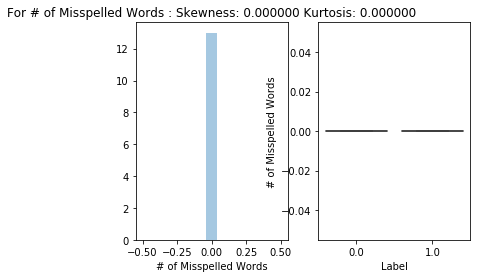

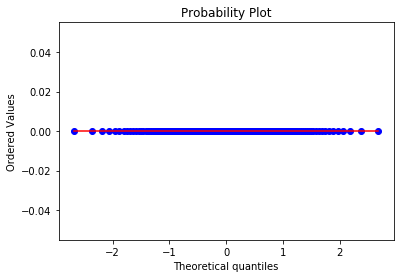

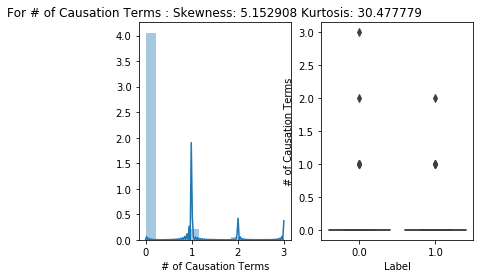

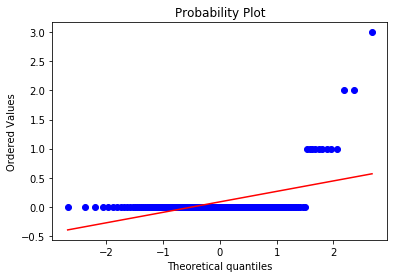

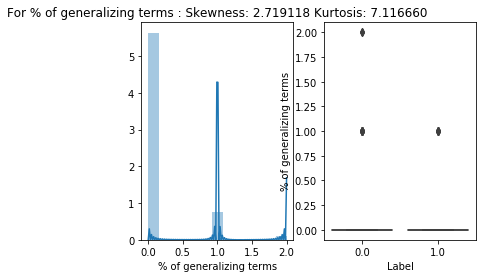

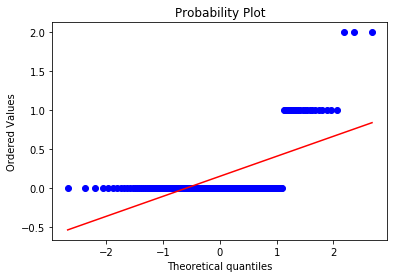

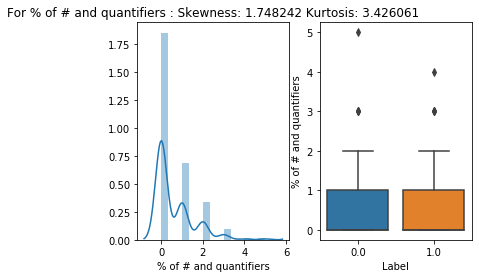

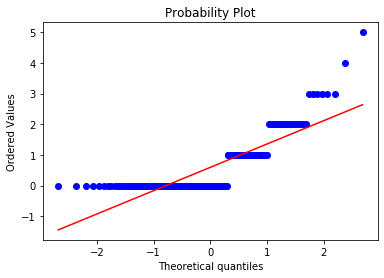

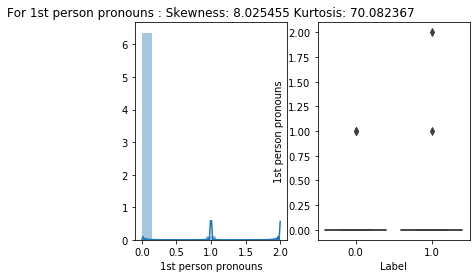

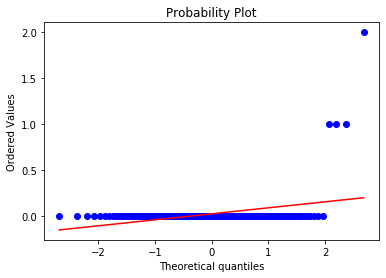

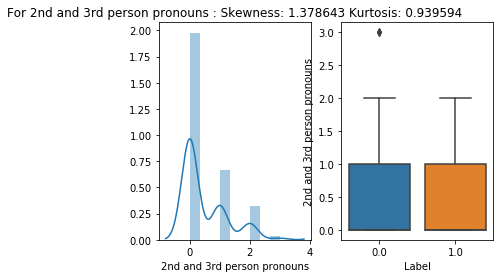

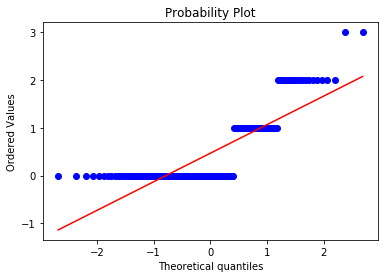

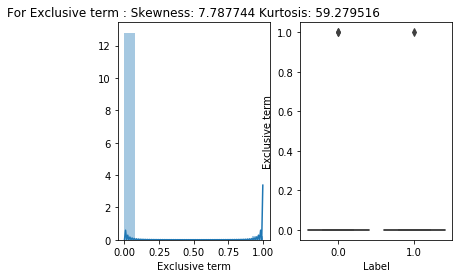

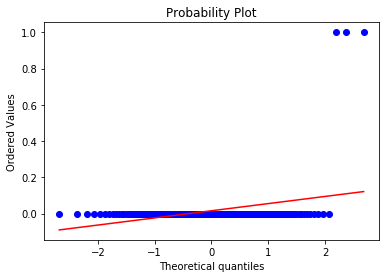

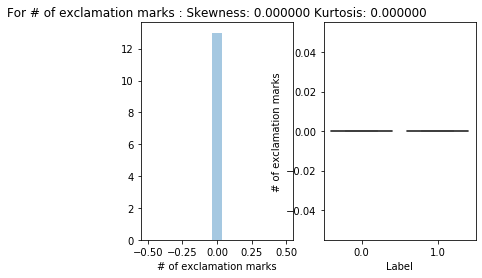

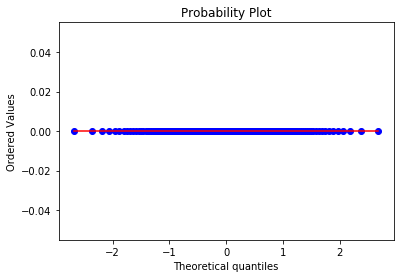

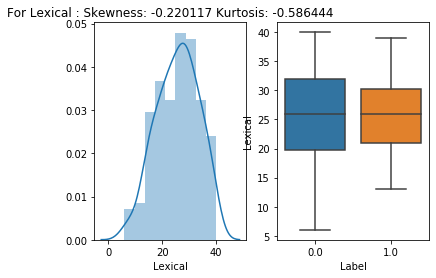

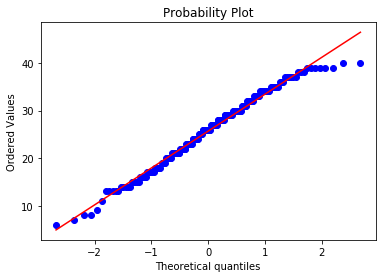

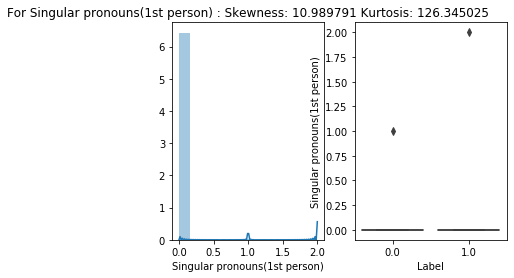

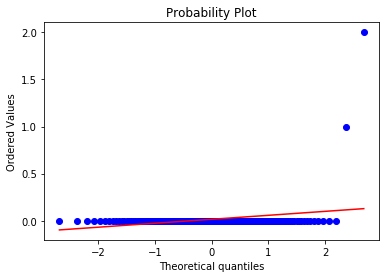

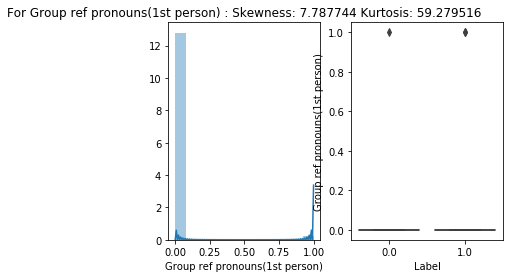

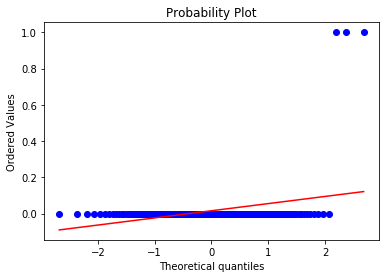

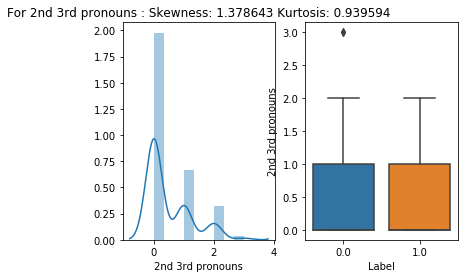

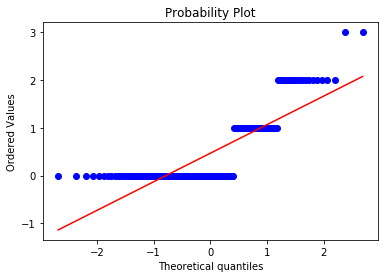

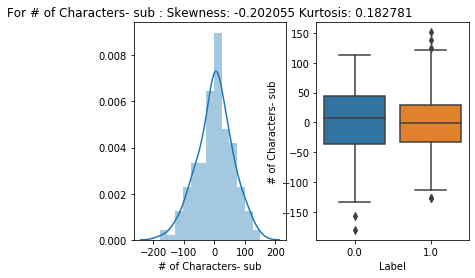

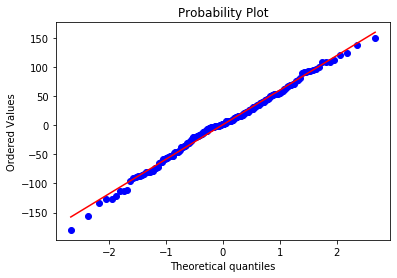

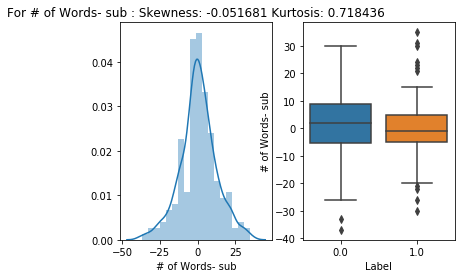

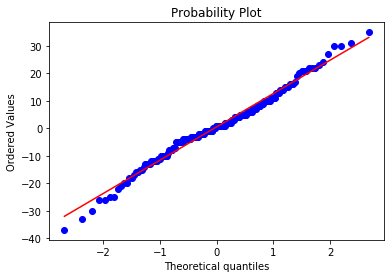

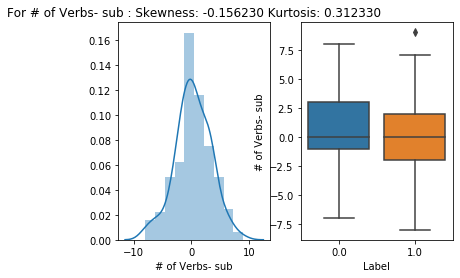

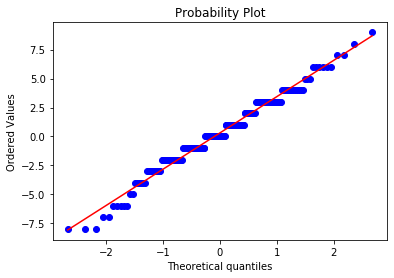

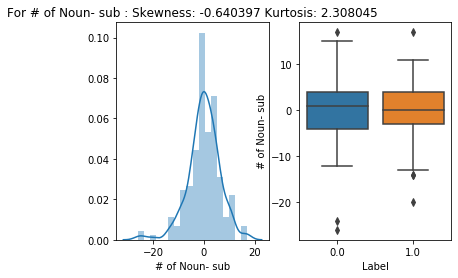

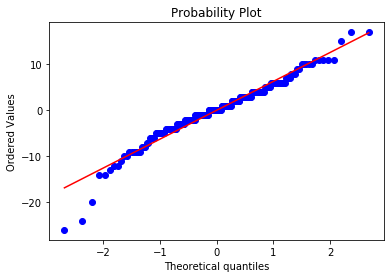

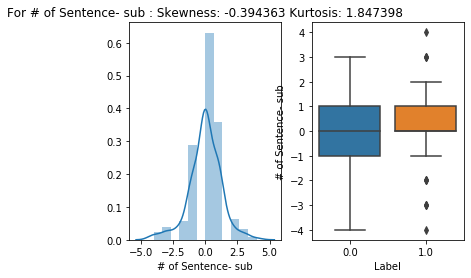

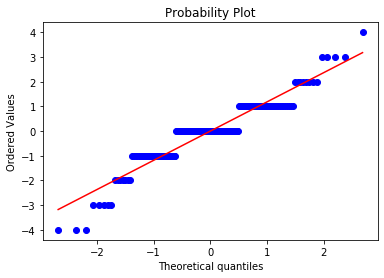

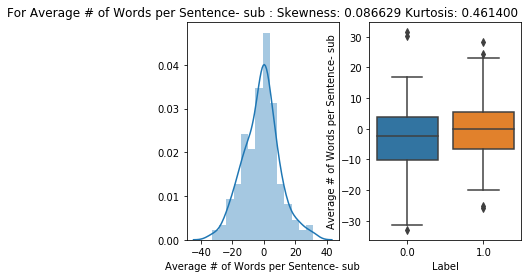

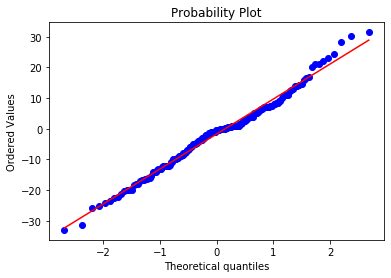

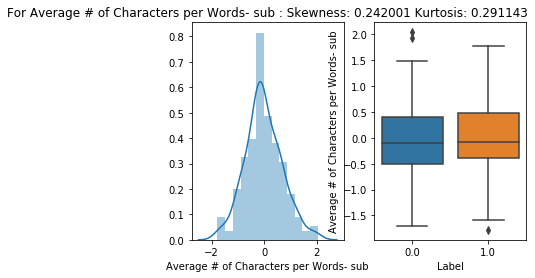

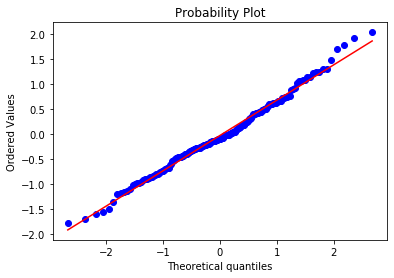

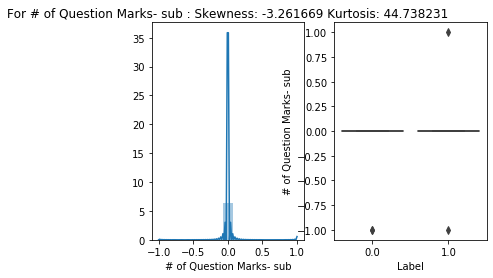

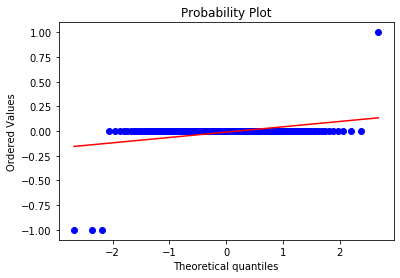

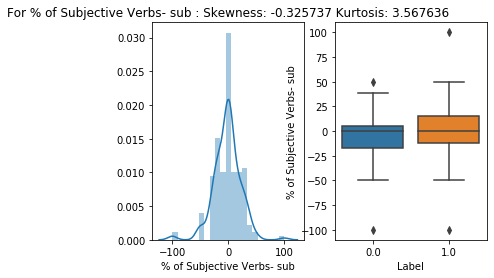

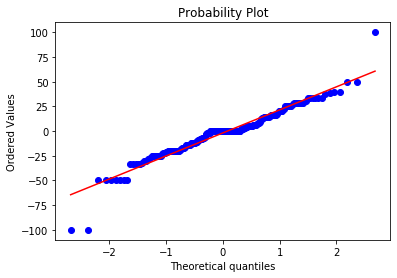

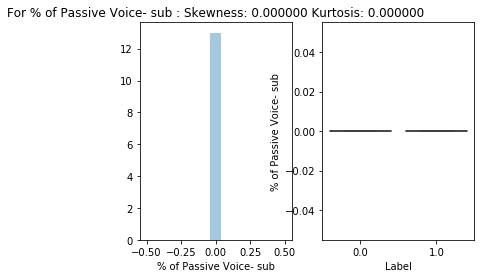

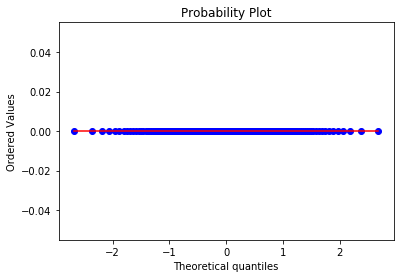

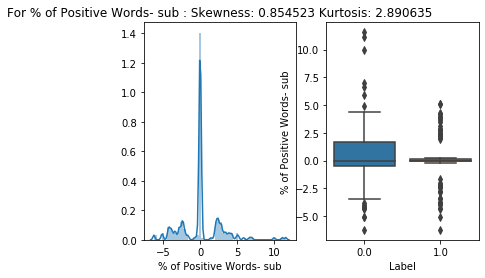

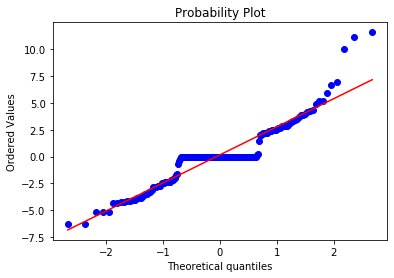

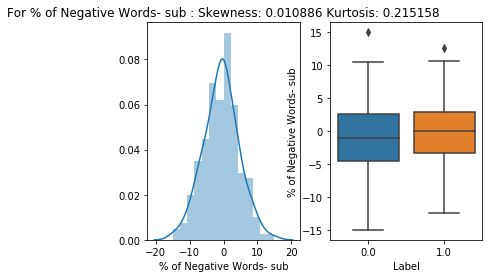

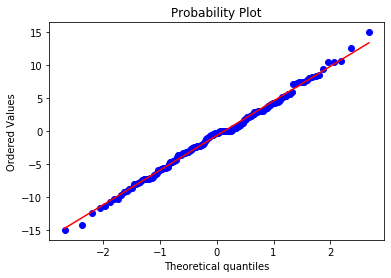

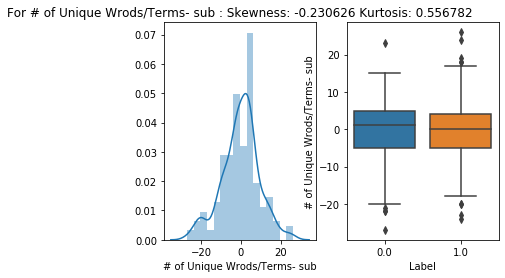

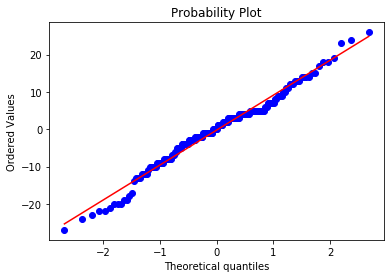

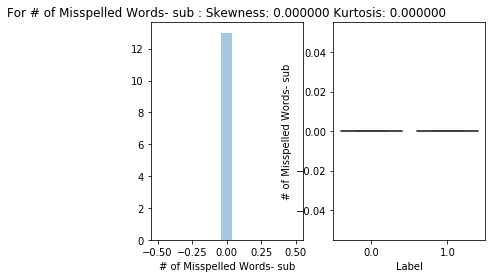

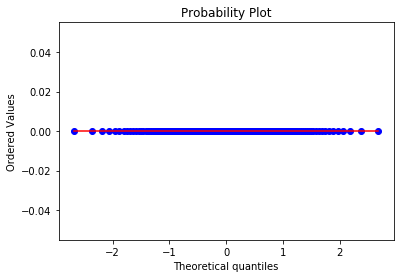

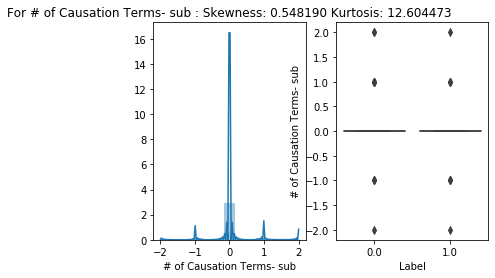

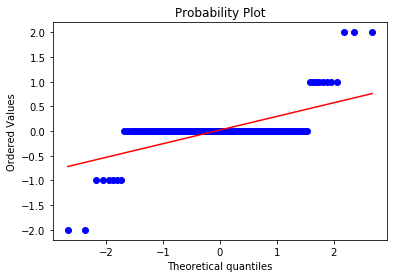

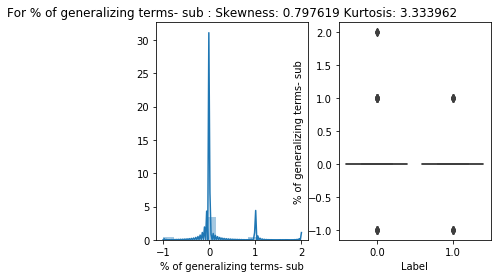

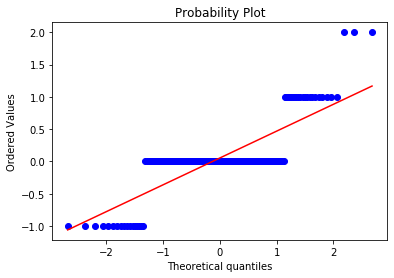

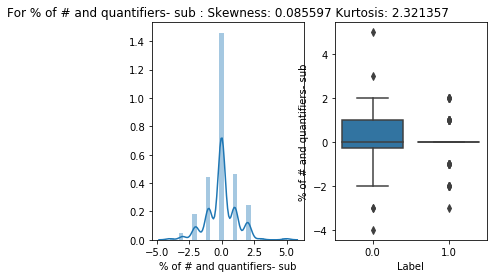

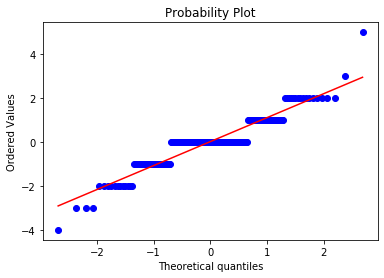

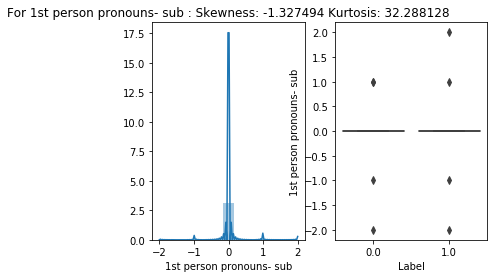

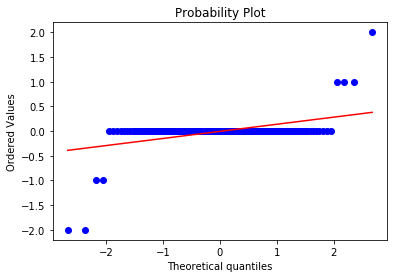

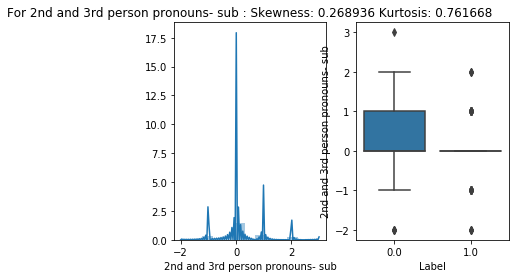

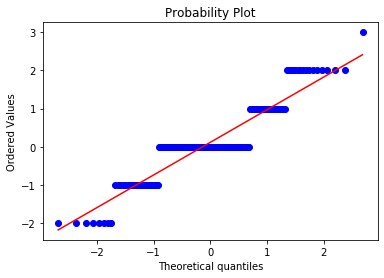

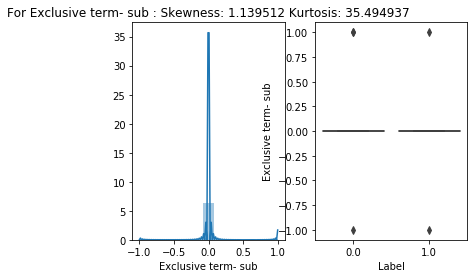

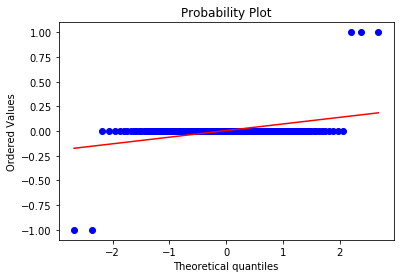

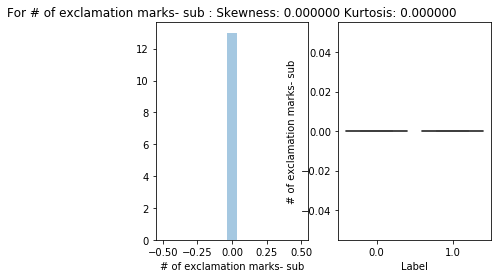

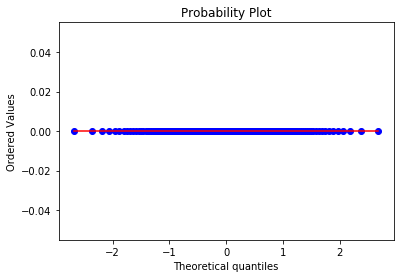

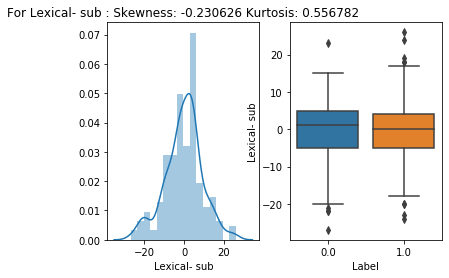

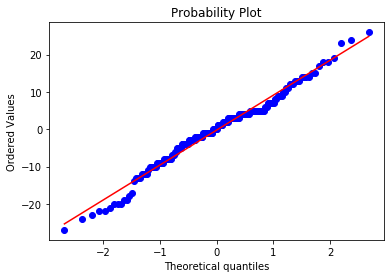

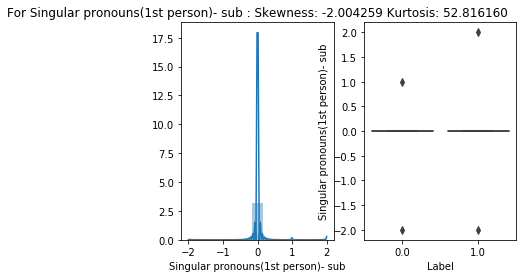

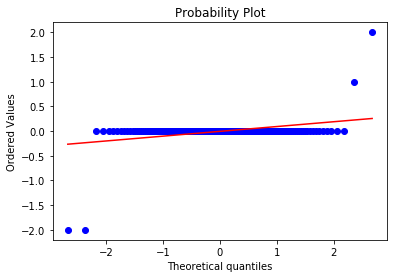

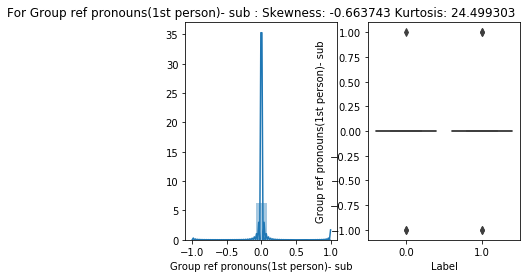

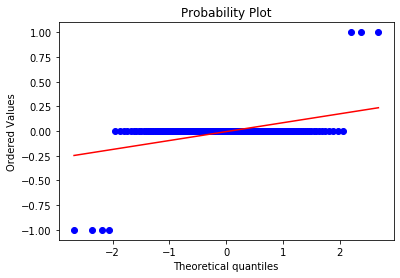

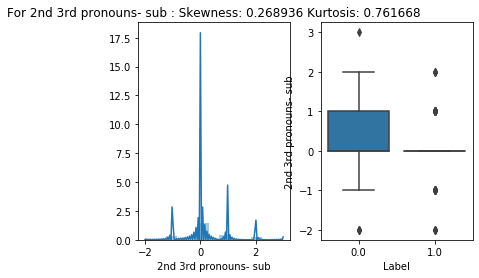

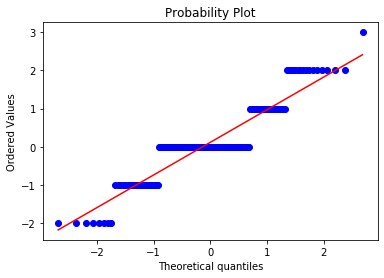

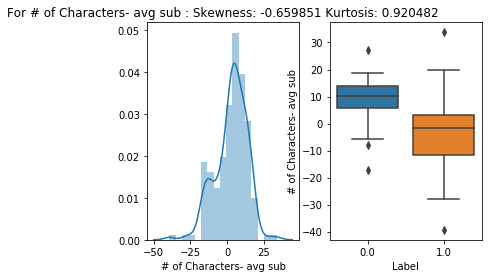

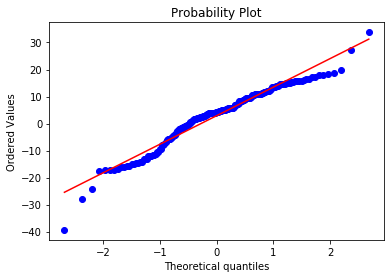

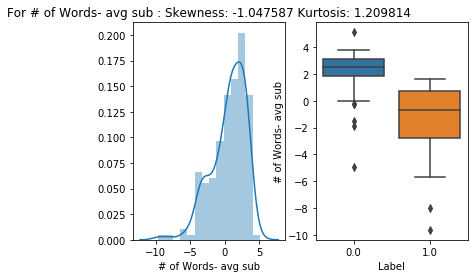

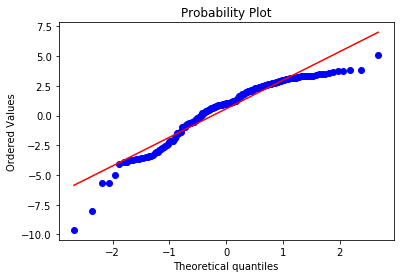

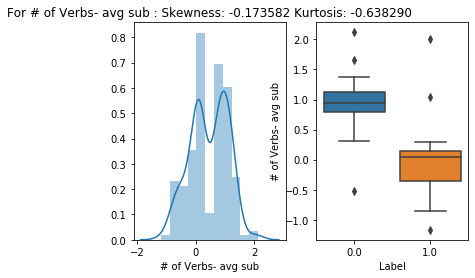

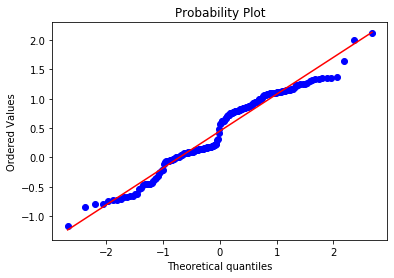

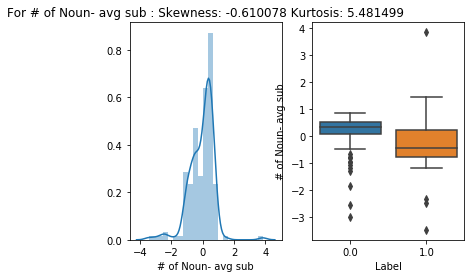

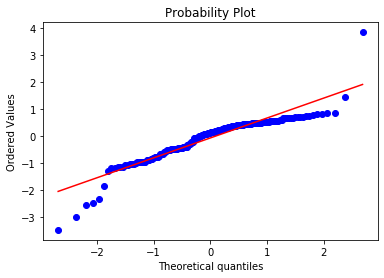

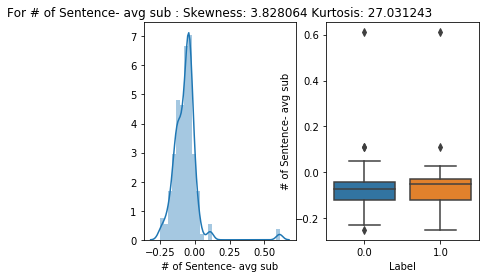

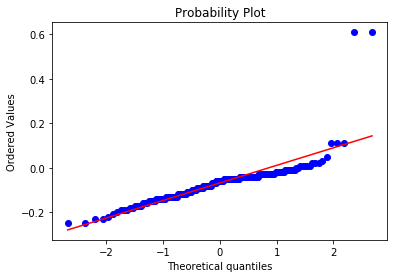

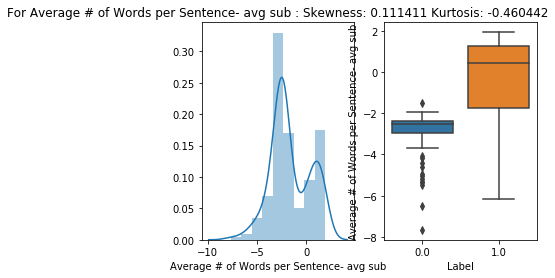

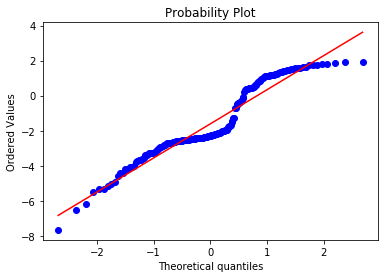

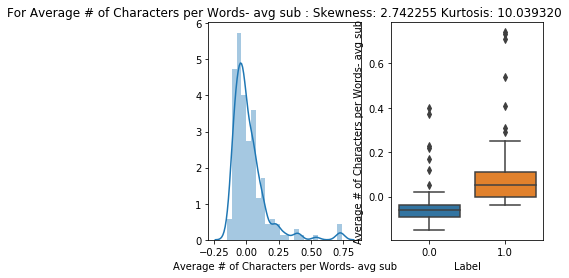

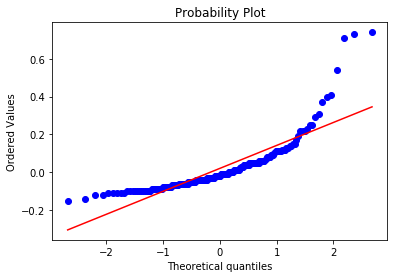

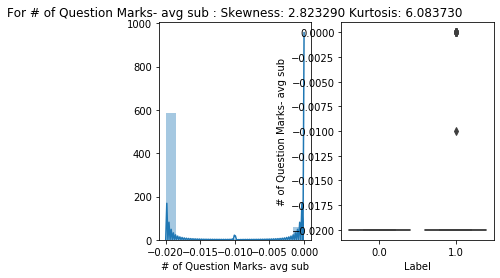

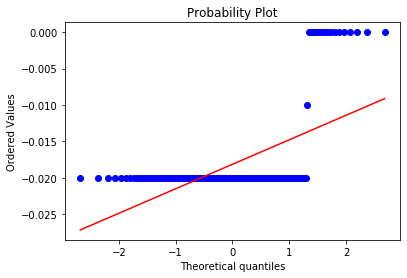

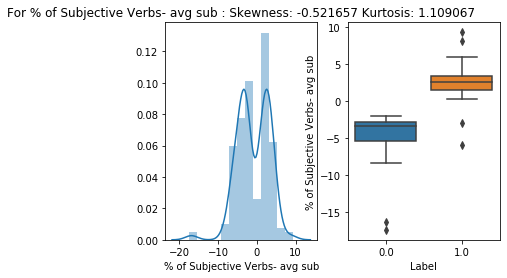

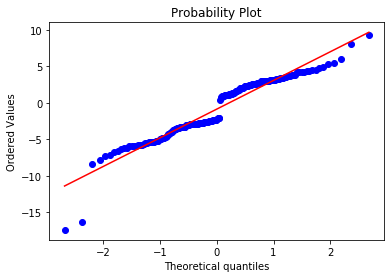

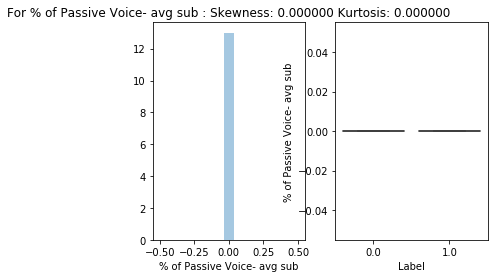

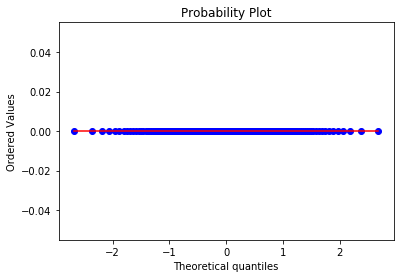

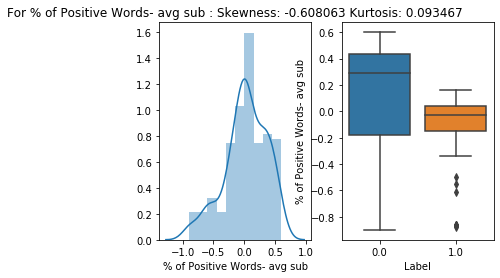

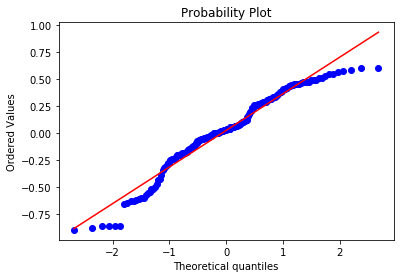

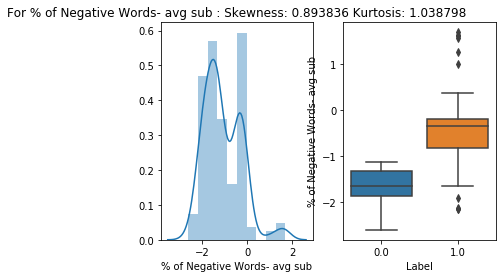

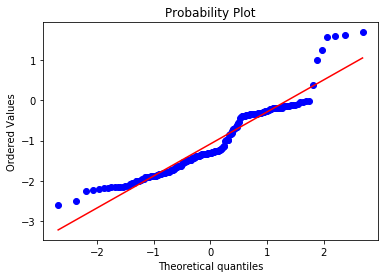

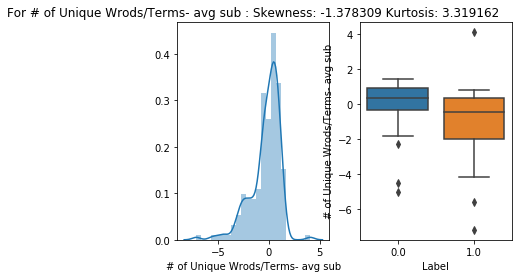

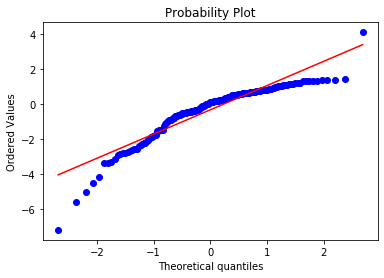

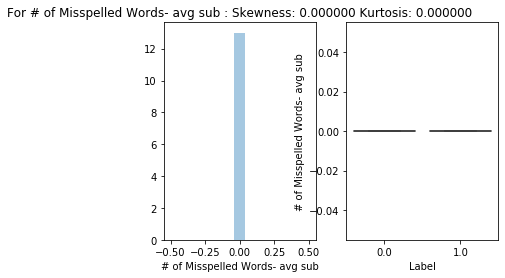

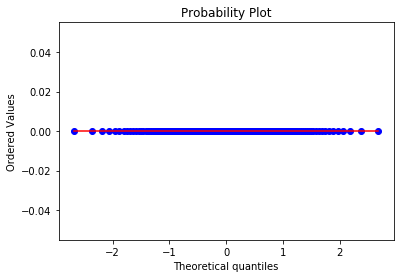

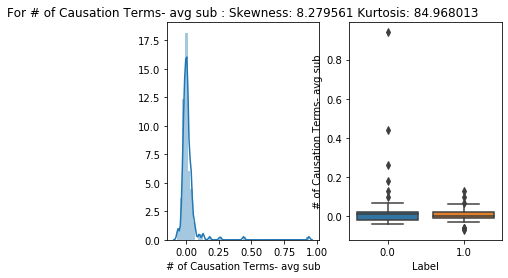

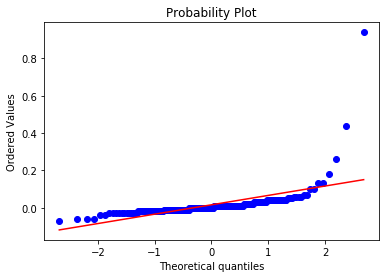

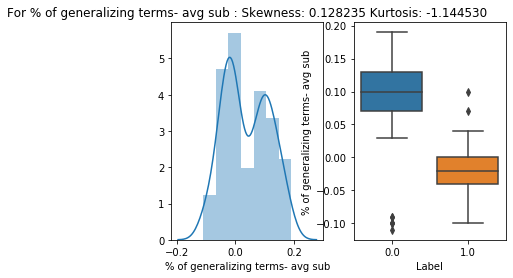

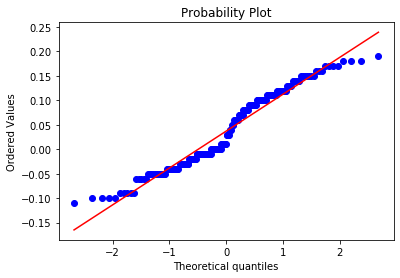

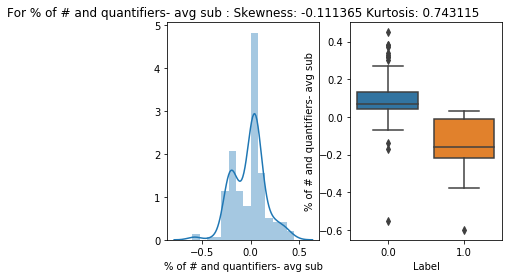

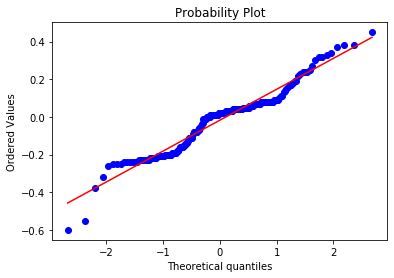

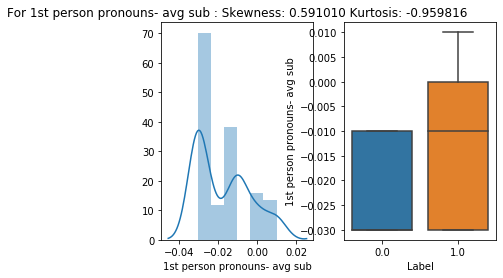

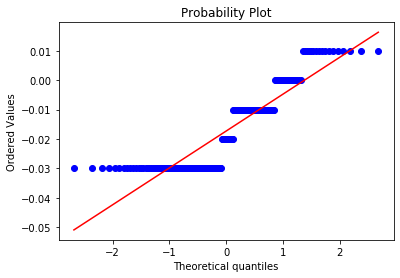

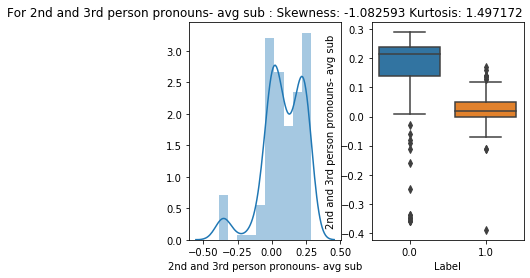

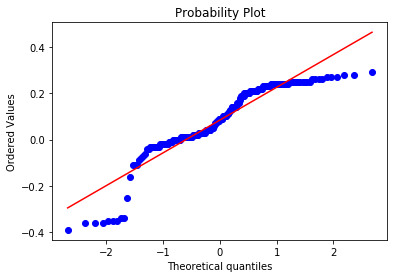

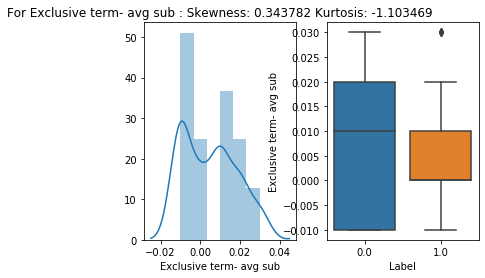

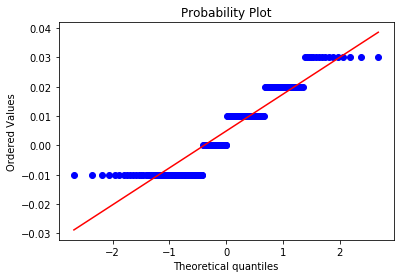

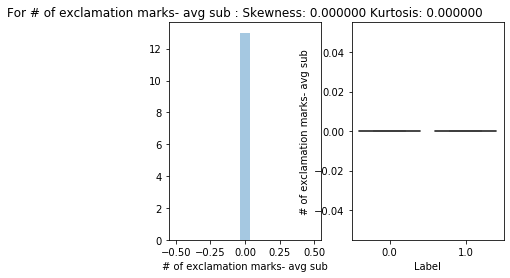

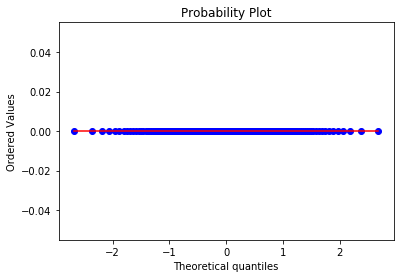

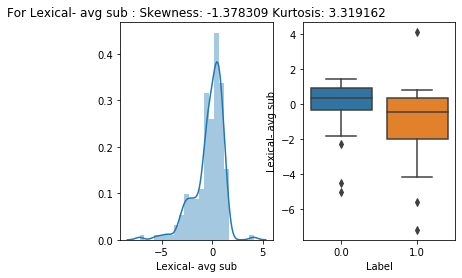

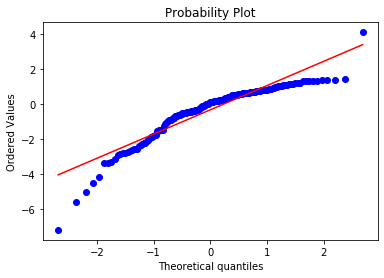

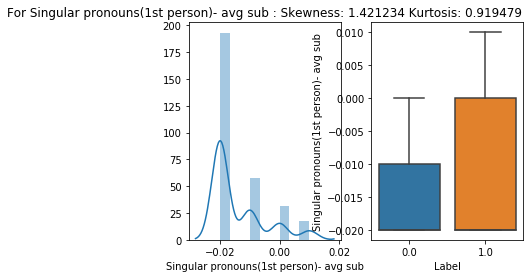

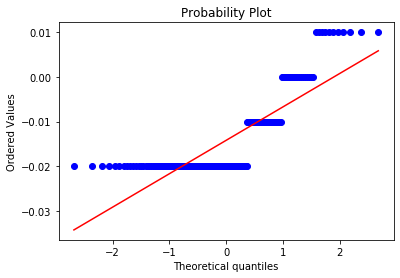

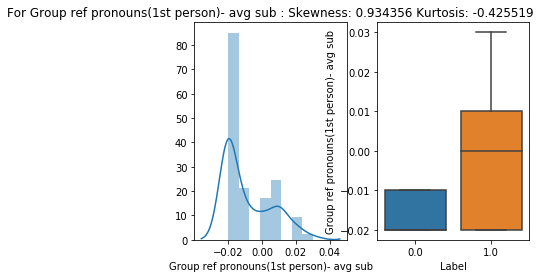

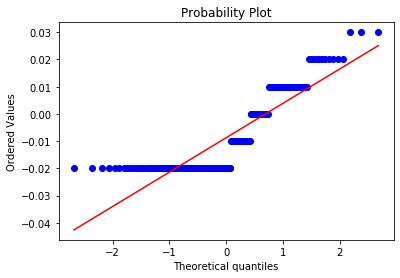

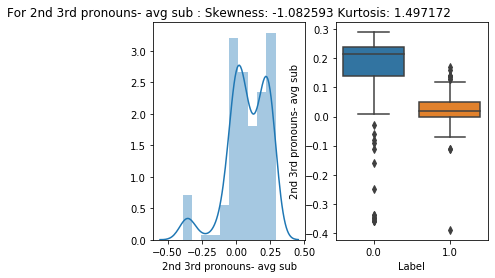

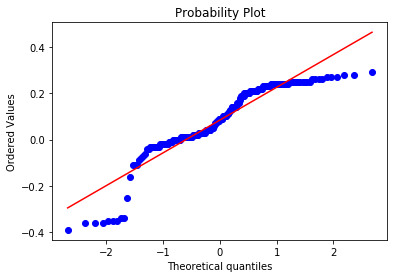

In [49]:
for var in feature_list:
    feature_distrib(var)

<h2> Bivariate analysis <!h2>

In [55]:
#bivariate analysis reliablity/x
def feature_scatter(feature):
    Fdata = pd.concat([data['Label'], data[var]], axis=1)
    Fdata.plot.scatter(x='Label', y=var);

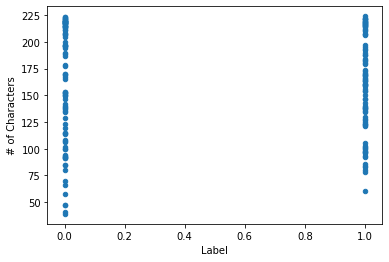

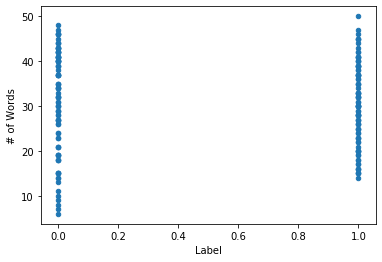

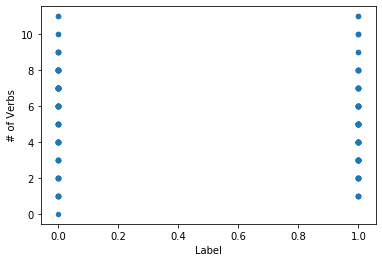

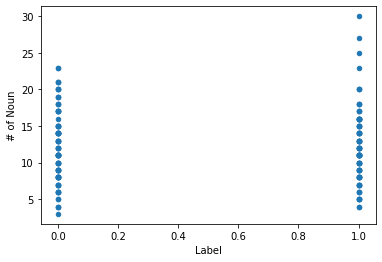

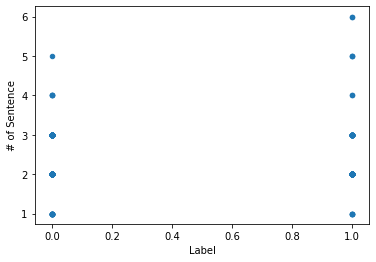

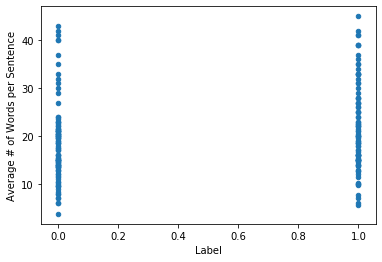

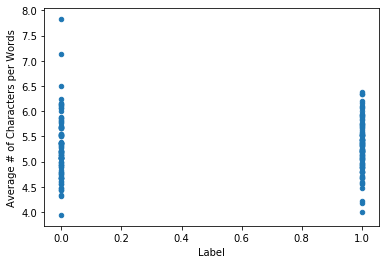

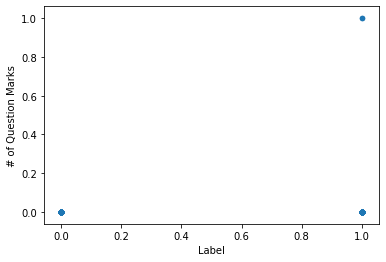

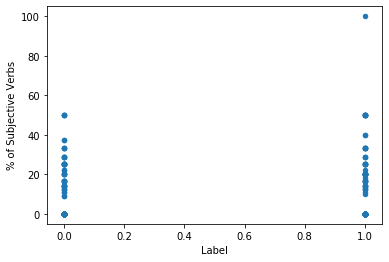

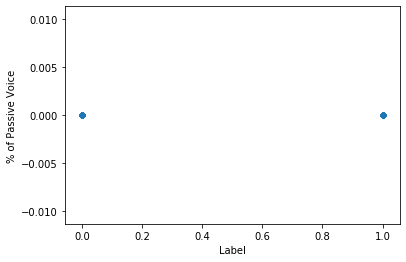

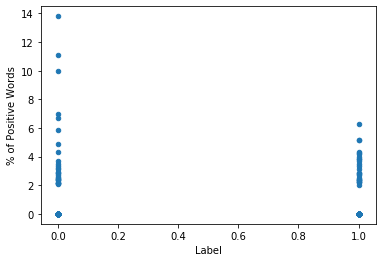

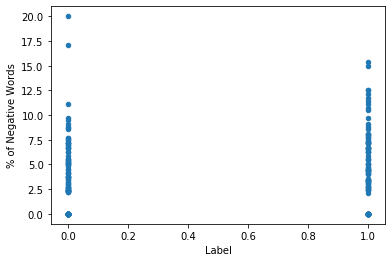

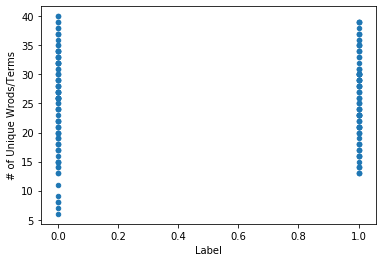

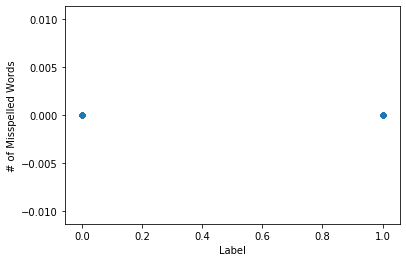

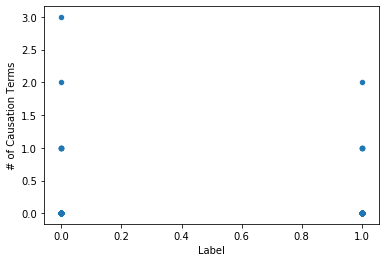

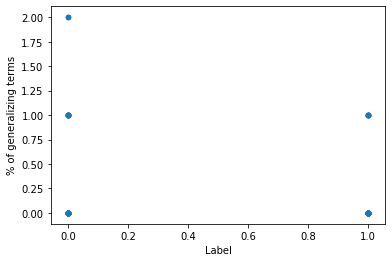

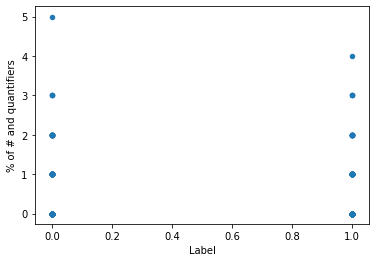

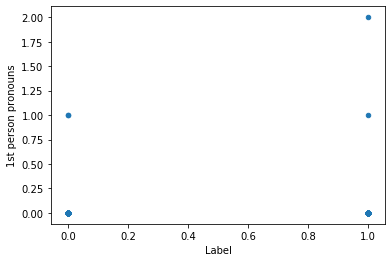

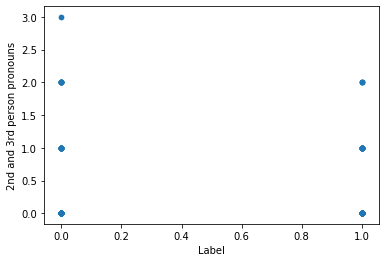

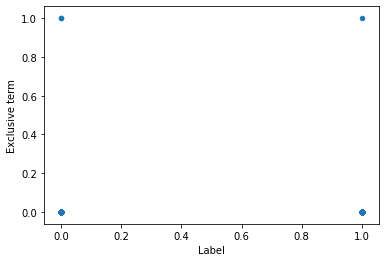

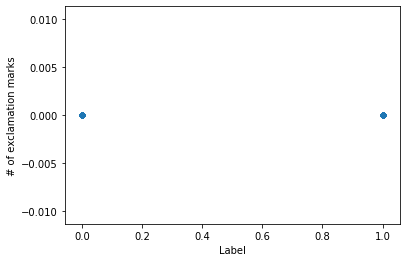

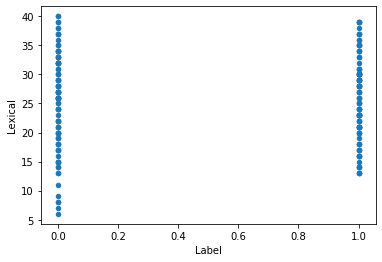

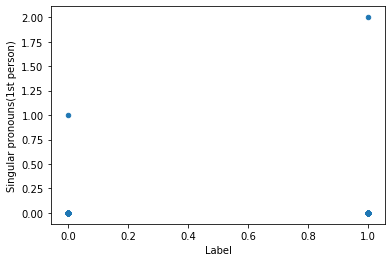

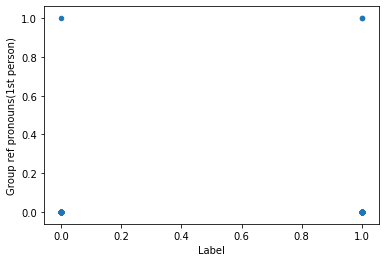

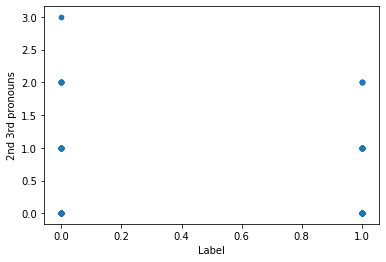

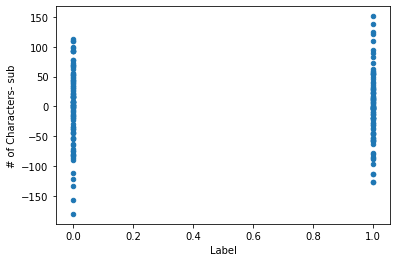

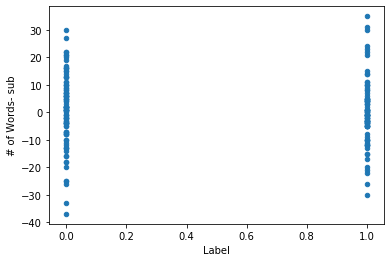

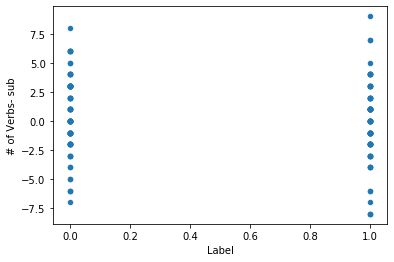

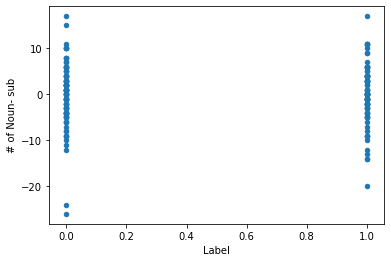

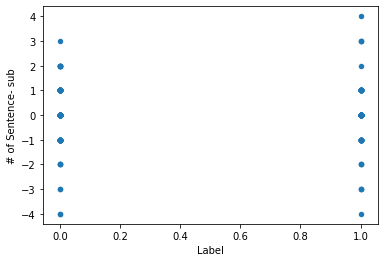

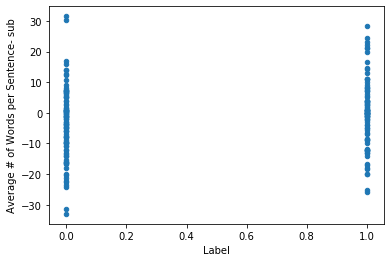

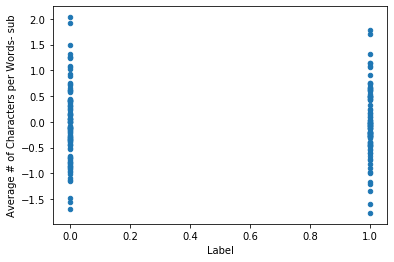

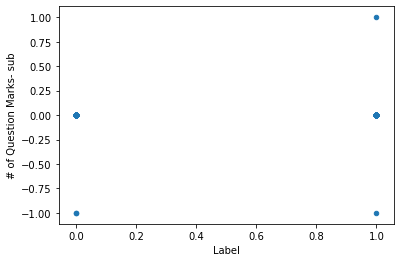

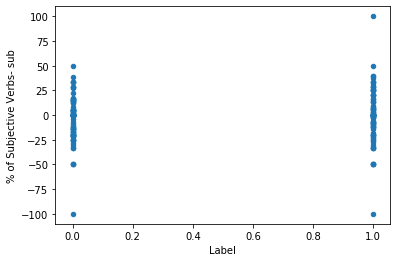

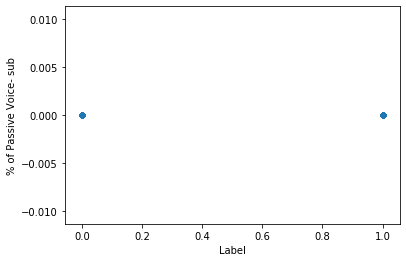

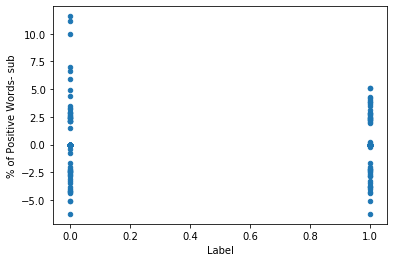

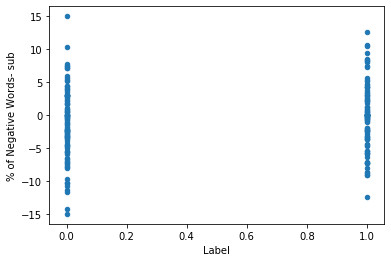

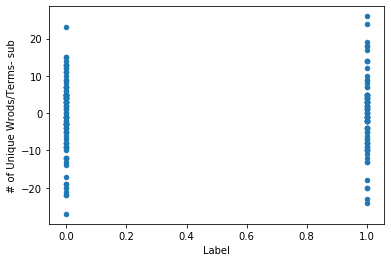

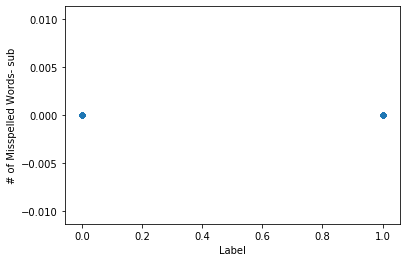

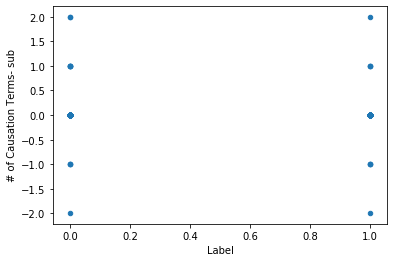

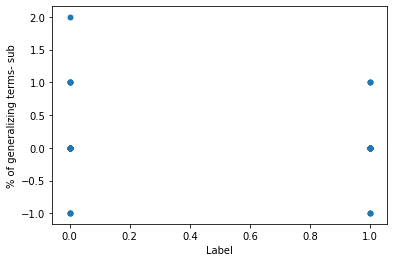

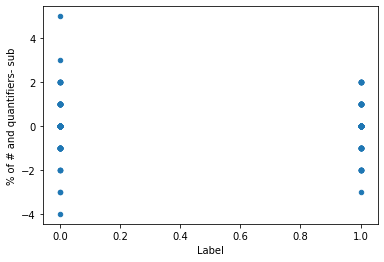

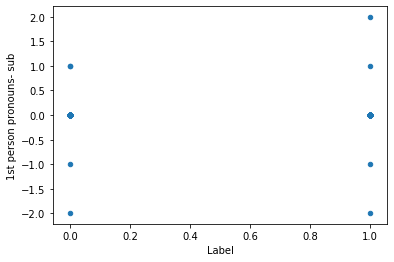

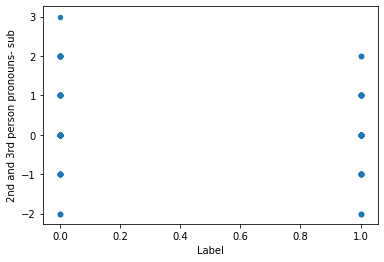

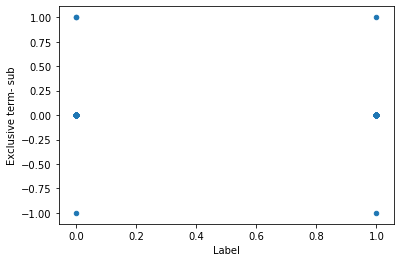

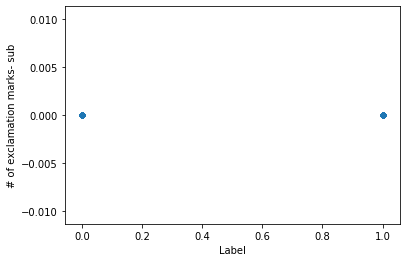

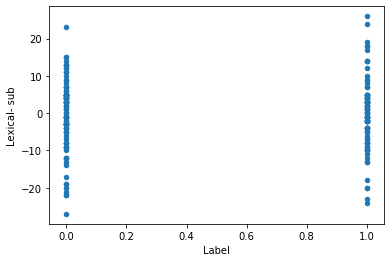

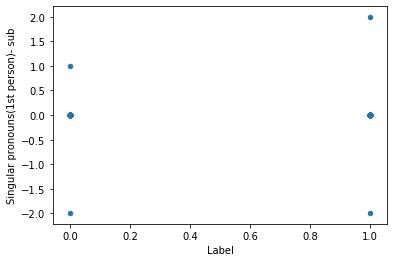

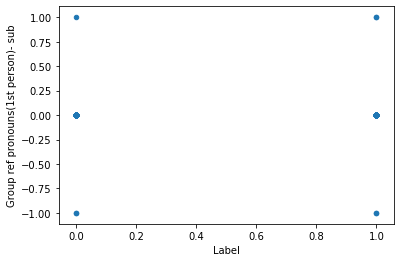

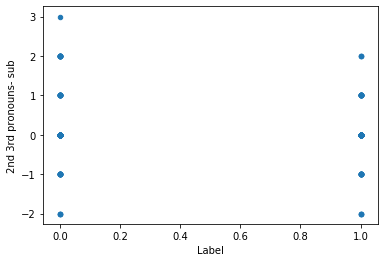

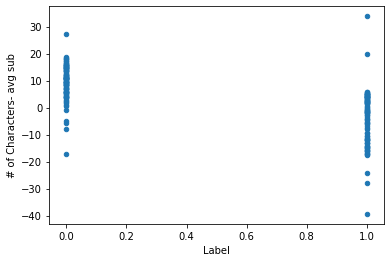

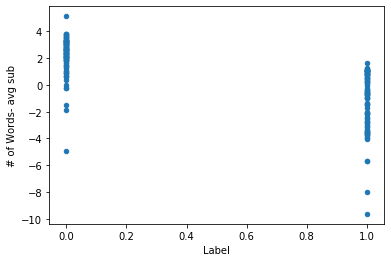

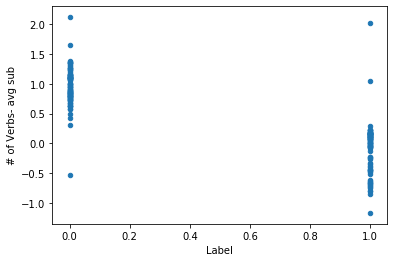

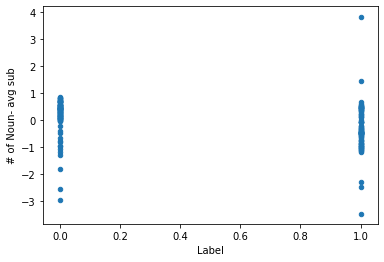

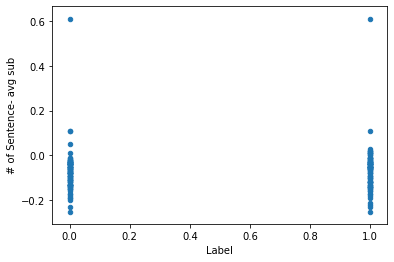

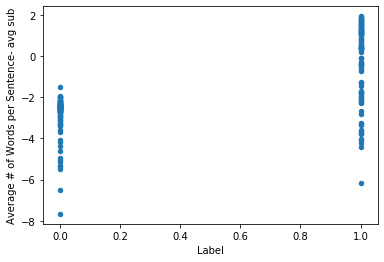

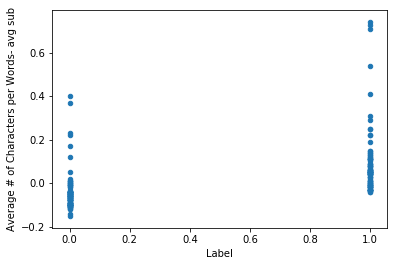

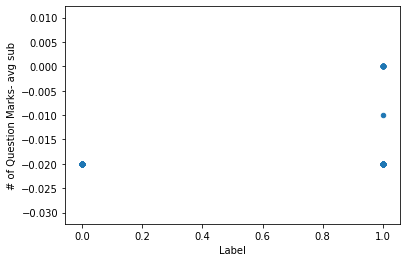

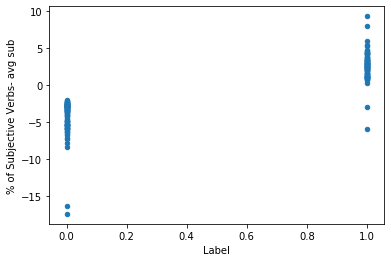

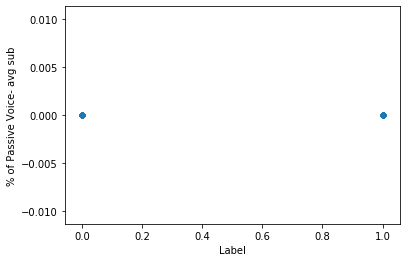

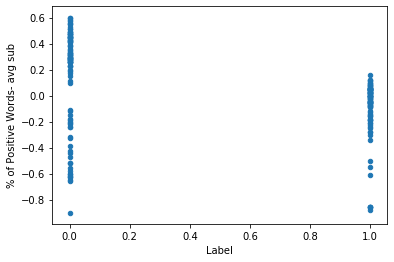

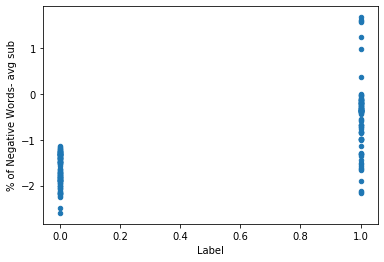

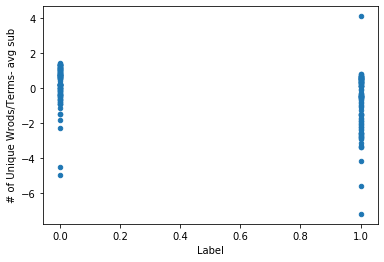

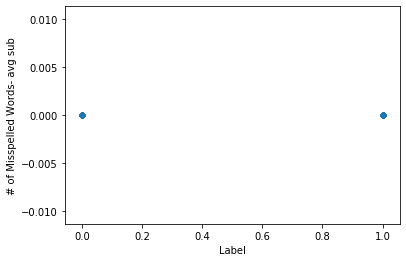

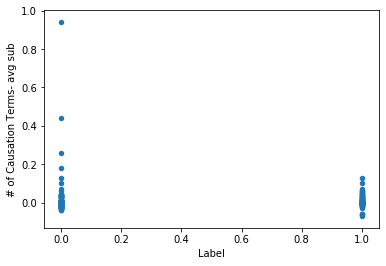

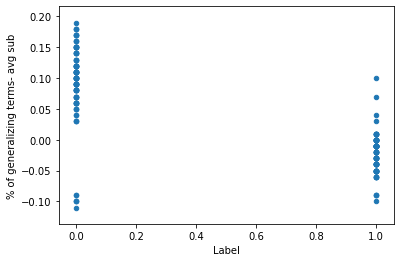

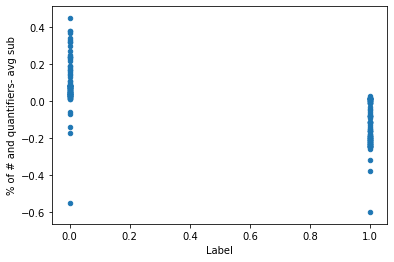

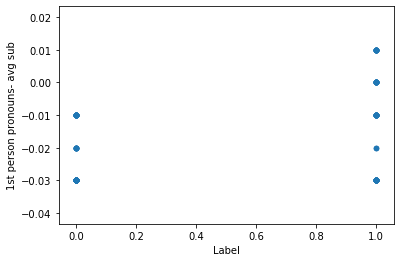

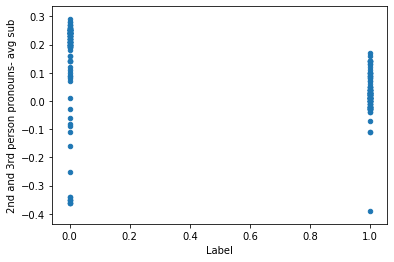

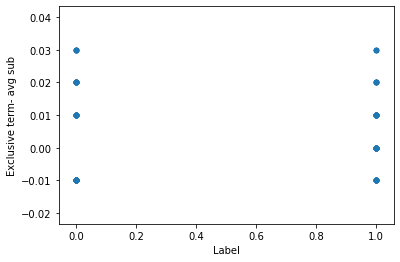

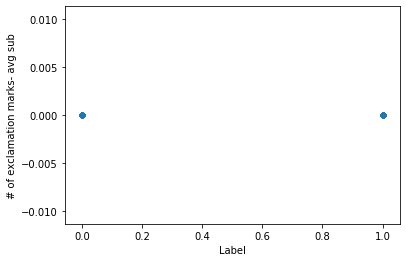

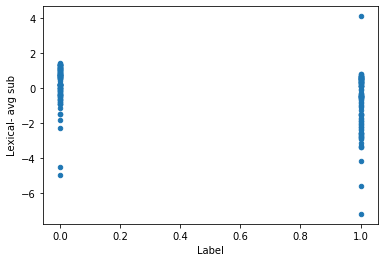

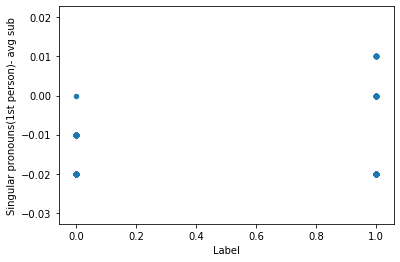

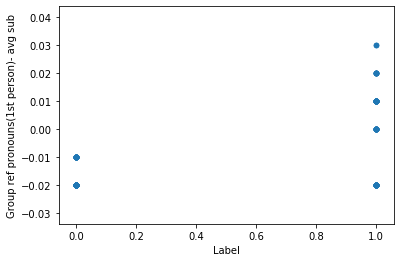

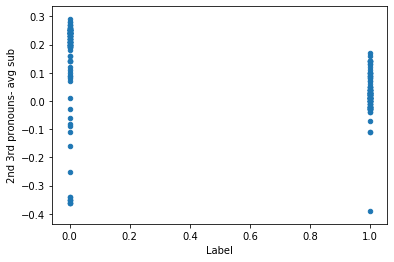

In [56]:
for var in feature_list:
    feature_scatter(var)

<h2>deeper analysis on selected features<!h2>

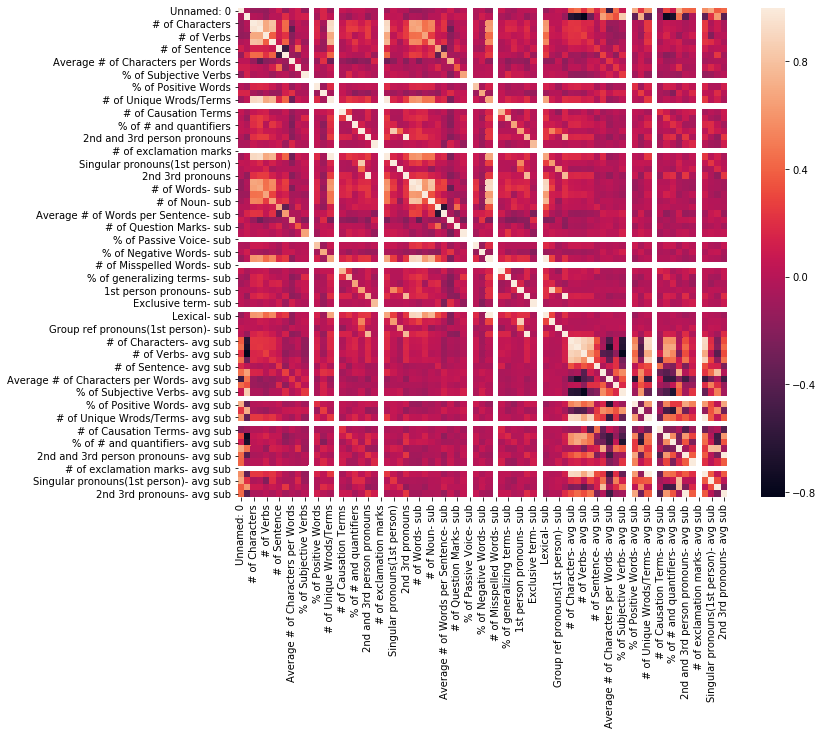

In [63]:
#correlation matrix to detect multicollinearity (one feature predict another linearly)
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);


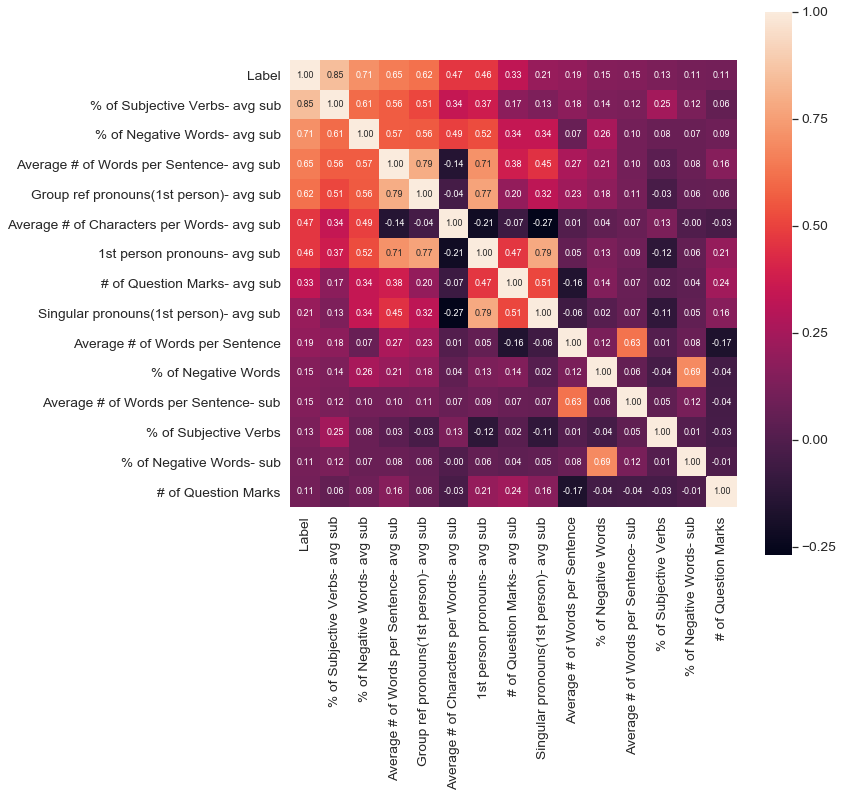

In [86]:
#correlation matrix
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Label')['Label'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values, ax = ax)
plt.show()

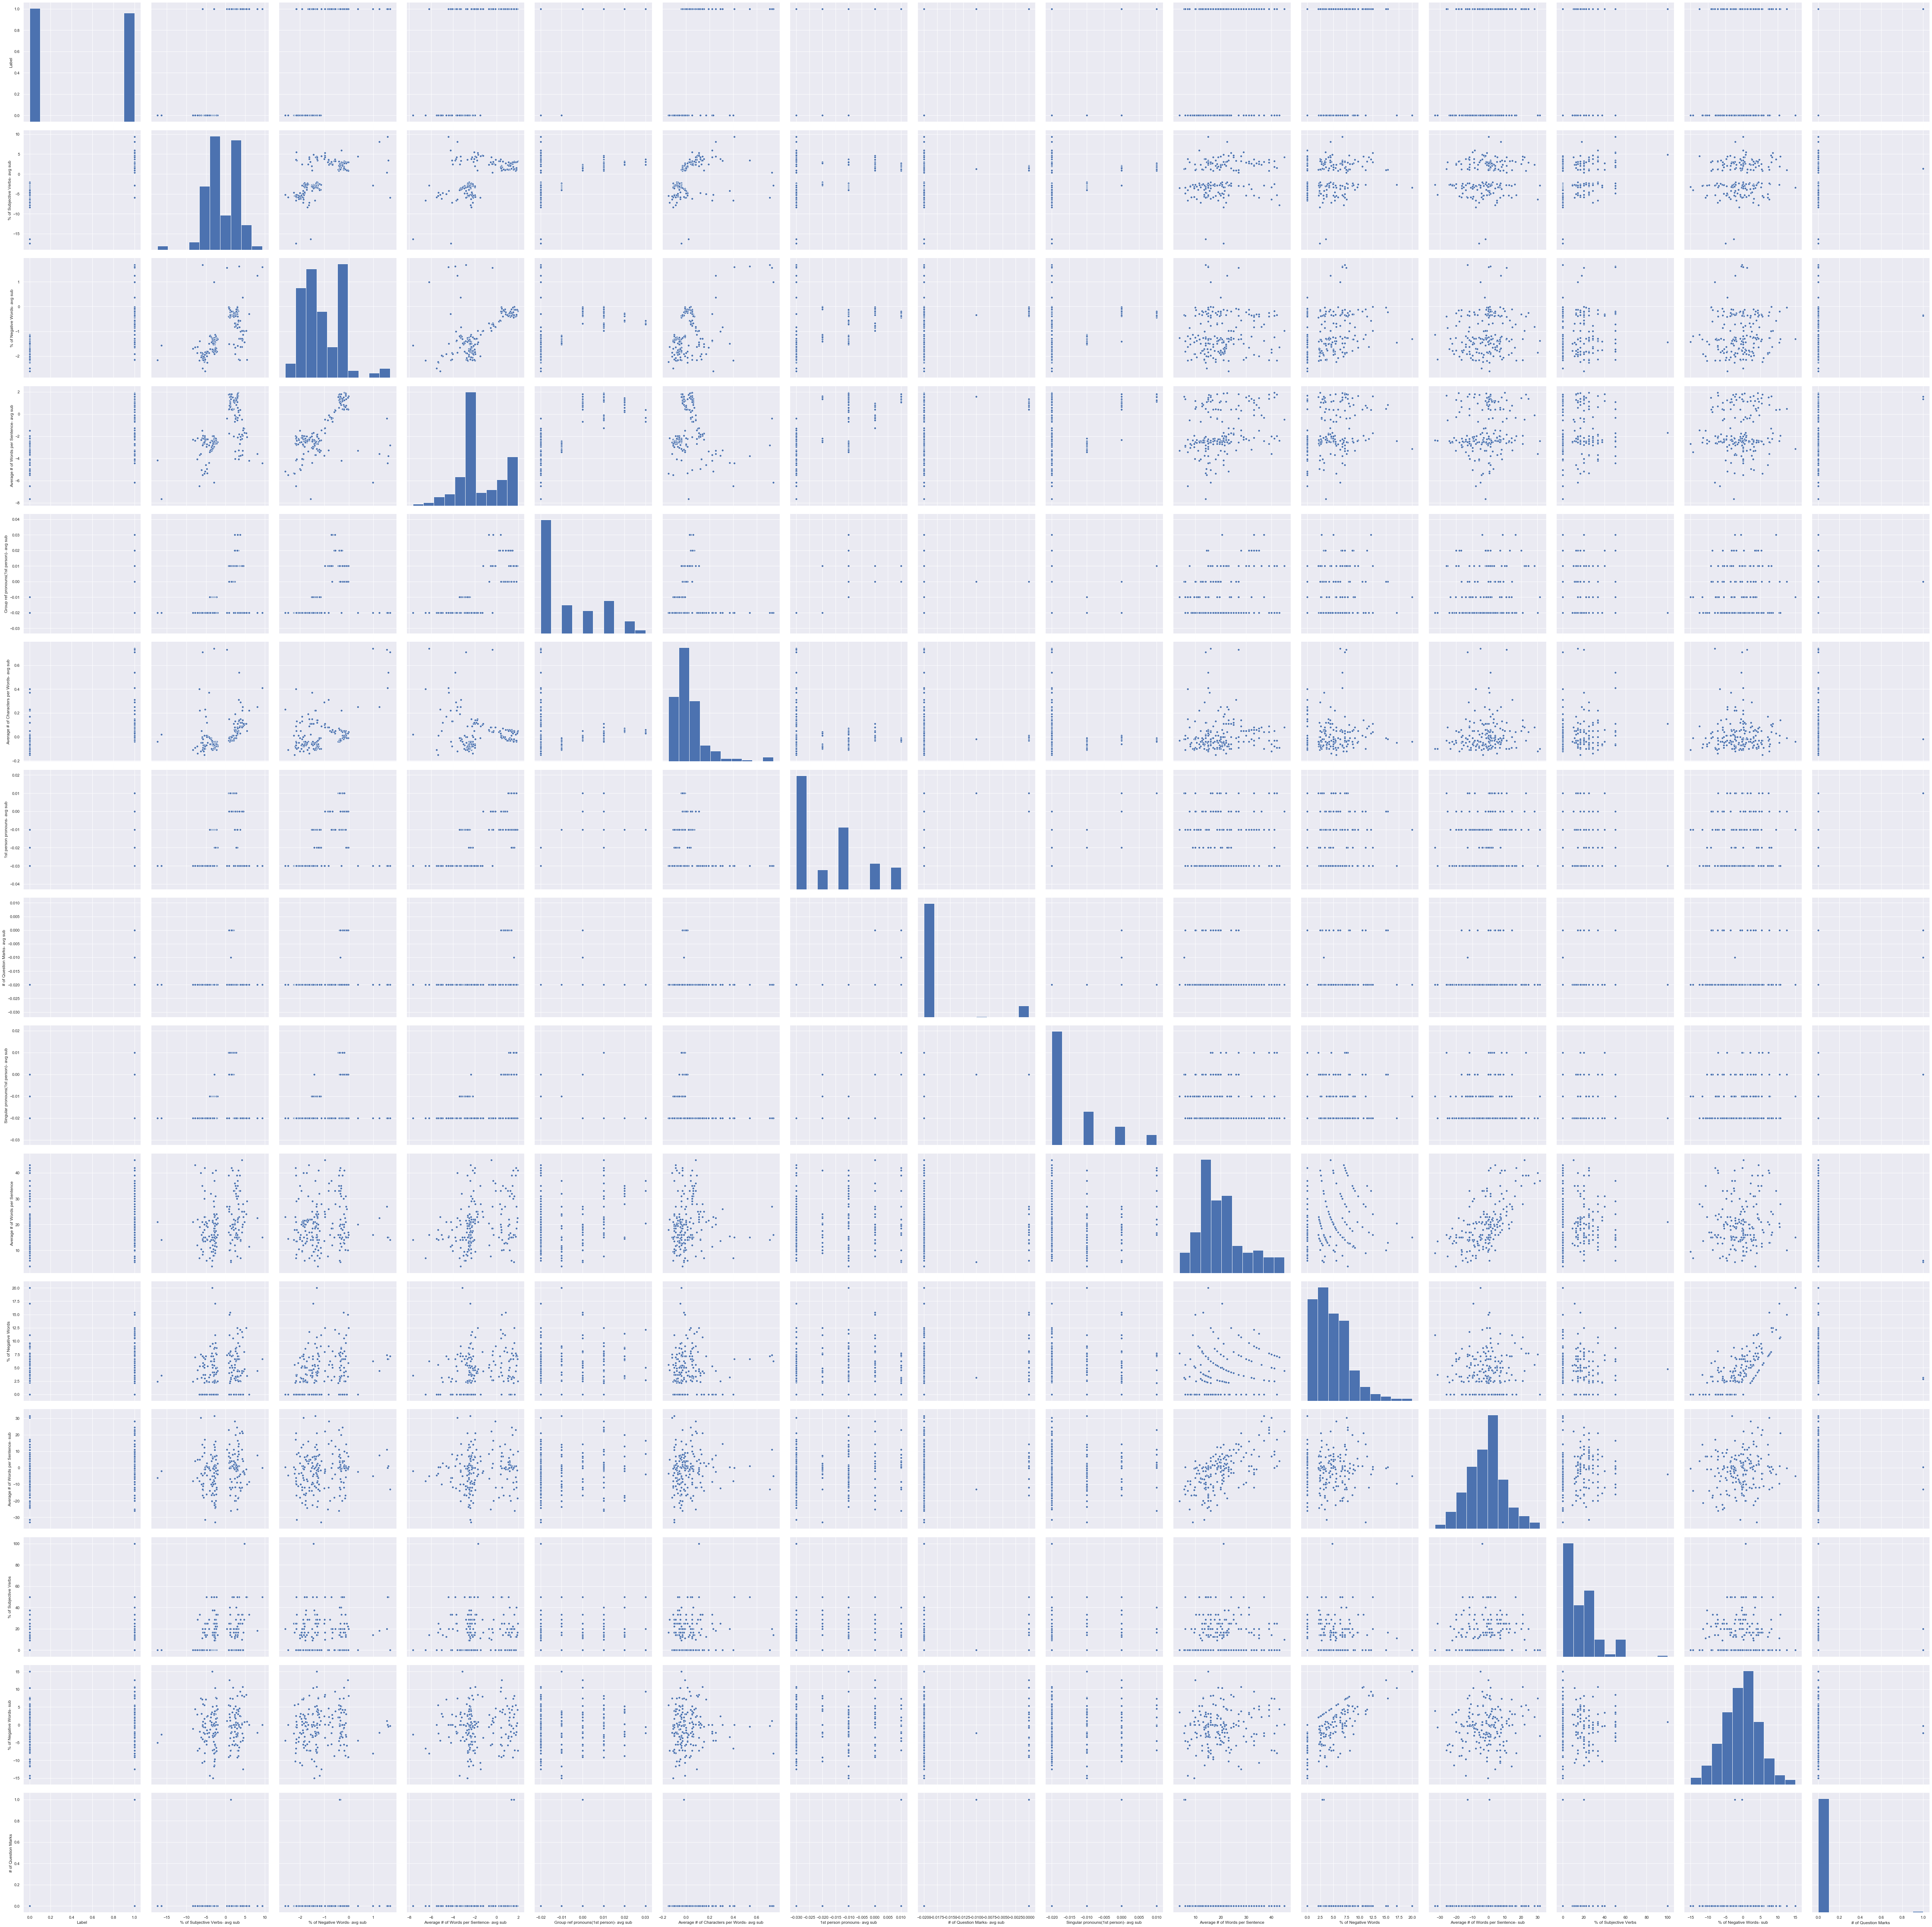

In [87]:
#scatterplot
sns.set()
sns.pairplot(data[cols], size = 5)
plt.show();

In [91]:
chosen_features = pd.concat([data['Text'], data['Reference'], data[cols]], axis = 1)
print(chosen_features.head(5))

chosen_features.to_csv("ChosenFeatures.csv")

                                                Text  \
0  Coronaviruses caused SARS, MERS, and the curre...   
1  The coronavirus — which originated in Wuhan, C...   
2  The tech sector is feeling the impact of gover...   
3  Recommendations for blunting the spread of inf...   
4    The State Department issued the travel advisory   

                                           Reference  Label  \
0  Asians and Asian Americans are facing increase...    0.0   
1  Future cruisegoers are expressing concern over...    0.0   
2  US stock futures dropped Sunday evening as the...    0.0   
3  The novel coronavirus-related shock to US mark...    0.0   
4  Apple is temporarily closing all of its stores...    0.0   

   % of Subjective Verbs- avg sub  % of Negative Words- avg sub  \
0                          -16.37                         -1.57   
1                          -17.41                         -2.16   
2                           -6.64                         -1.39   
3               